# Статистика, прикладной поток
## Практическое задание 4


**Правила:**

* Дедлайн **7 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds20_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* При решении без доказательства можно пользоваться любыми теоретическими свойствами, которые были на лекциях или семинарах.
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 - 5 баллов **O2**
* Задача 2 - 5 баллов **O2**
* Задача 3 - 5 баллов **O2**
* Задача 4 - 5 баллов **O2**
* Задача 5 - 7 баллов **O2**
* Задача 6 - 7 баллов **O2**
* Задача 7 - 7 баллов **O2**
* Задача 8 - 10 баллов **O3**
* Задача 9 - 6 баллов **O2**
* Задача 10 - 15 баллов **O3**

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(palette='Set2')
warnings.filterwarnings('ignore')

%matplotlib inline

## Доверительные интервалы

*Замечание*. Вы должны помнить о разнице между доверительным интервалом и *реализацией* доверительного интервала. На практике обычно слово *реализация* опускается.

__________________
### Задача 1.
В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. 

Чтобы не плодить код, напишите следующую функцию (см. ниже). Пример построения есть в ноутбуке по `matplotlib` из курса "Введение в анализ данных". При выборе стиля графика помните, что если изображаются лишь точки и линии, то лучше использовать серый фон, а если присутствуют закрашенные области, то предпочтительнее белый. Графики первого типа еще называют "легкими", а второго — "тяжелыми".

In [6]:
def draw_confidence_interval(
    left, right, estimation=None, sample=None, 
    ylim=(None, None), color_estimation='#FF3300', color_interval='#00CC66', 
    color_sample='#0066FF', label_estimation='Оценка'
):
    """Рисует доверительный интервал и оценку в зависимости от размера выборки.
    
    :param left: левые границы интервалов (в зависимости от n)
    :param right: правые границы интервалов (в зависимости от n)
    :param estimation: оценки (в зависимости от n)
    :param sample: выборка
    :param ylim: ограничение вертикальной оси
    :param color_estimation: цвет оценки
    :param color_interval: цвет интервала
    :param color_sample: цвет выборки
    :param label_estimation: подпись для оценки
    """
    plt.figure(figsize=(14, 12))
    plt.xlabel('n', fontsize=14)
    plt.title('Зависимость оценки и интервалов от n', fontsize=16)
    if not isinstance(ylim[0], type(None)) or not isinstance(ylim[1], type(None)):
        plt.ylim(ylim)
    
    x = np.arange(1, sample_size + 1)
    plt.fill_between(x, left, right, alpha=0.5, label='Интервал', color=color_interval)
    if not isinstance(estimation, type(None)):
        plt.plot(estimation, c=color_estimation, label=label_estimation)
    if not isinstance(sample, type(None)):
        plt.scatter(x, sample, c=color_sample, label='Точки выборки', alpha=0.5)
    
    plt.legend(fontsize=14)

Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ на основе статистики $X_{(n)}$.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.

*Замечания.*

1. Если интервал получен на лекции/семинаре, то нужно просто выписать его формулу. Если такой случай не рассматривался, то нужно добавить его вывод.
2. Выводить, что полученный интервал имеет минимальную длину не требуется, достаточно разумно выбрать квантили.
3. Выборку надо сгенерировать один раз. Дело в том, что на практике при недостаточном размере выборки разумнее дособрать выборку, чем заново проводить все измерения.

**Решение.**

1. Точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ есть $\left(\overline{X} - z_{\frac{1+\alpha}{2}}\frac{1}{\sqrt{n}}; \overline{X} + z_{\frac{1+\alpha}{2}}\frac{1}{\sqrt{n}}\right)$.
2. Точный доверительный интервал минимальной длины в параметрической модели $U[0, \theta]$ есть $\left(X_{(n)}; X_{(n)}\frac{1}{\sqrt[n]{1-\alpha}}\right)$. Он был в дз $\Rightarrow$ был на семинаре, но я всё равно уже расписал, так что пускай =). Вспомним, что функция распределения $X_{(n)}$ есть $F_{\theta, X_{(n)}}(x) = \left(\frac{x}{\theta}\right)^n I\{0\le x\le \theta\} + I\{x > \theta\}$. Рассмотрим $T_1(X) = X_{(n)}, T_2(X) = X_{(n)}\cdot c_{\alpha}$, где значение $c_{\alpha}$ найдём из $P_{\theta}(X_{(n)}\le\theta\le X_{(n)}\cdot c_{\alpha}) = \alpha.$ Имеем:$$
P_{\theta}(X_{(n)}\le\theta\le X_{(n)}\cdot c_{\alpha}) = P(\theta\le X_{(n)}\cdot c_{\alpha}) = 1 - F\left(\frac{\theta}{c_{\alpha}}\right) = 1 - \left(\frac{1}{c_{\alpha}}\right)^n = \alpha \Longrightarrow c_{\alpha} = \sqrt[n]{\frac{1}{1-\alpha}}.
$$

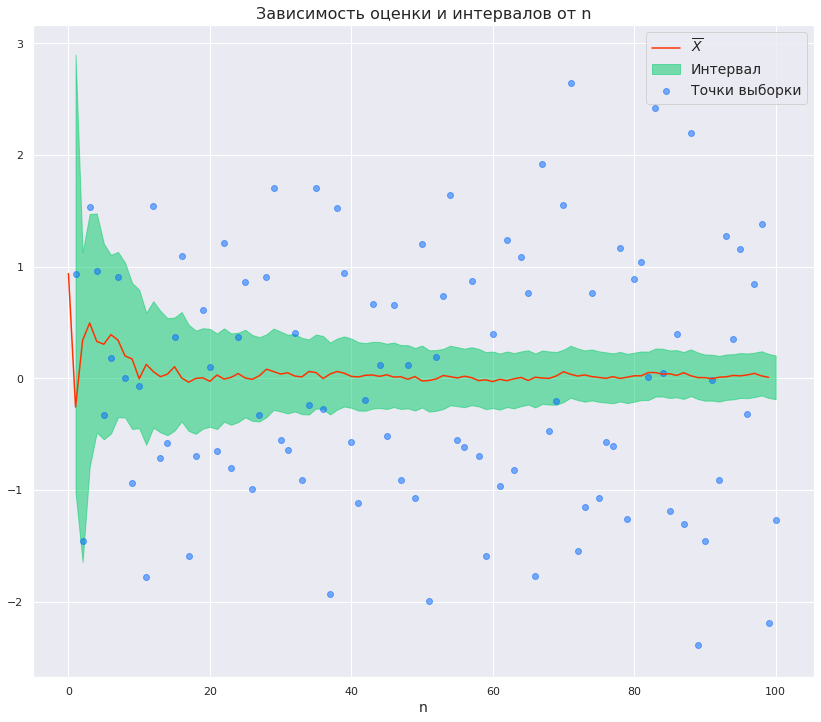

In [7]:
sample_size = 100
alpha = 0.95

sample = sps.norm.rvs(size=sample_size)
z_alpha = sps.norm.ppf((1 + alpha) / 2)

means = sample.cumsum() / np.arange(1, sample_size + 1)
left_bounds = means - z_alpha / np.sqrt(np.arange(1, sample_size + 1))
right_bounds = means + z_alpha / np.sqrt(np.arange(1, sample_size + 1))

draw_confidence_interval(left_bounds, right_bounds, means, sample,
                         label_estimation=r'$\overline{X}$')

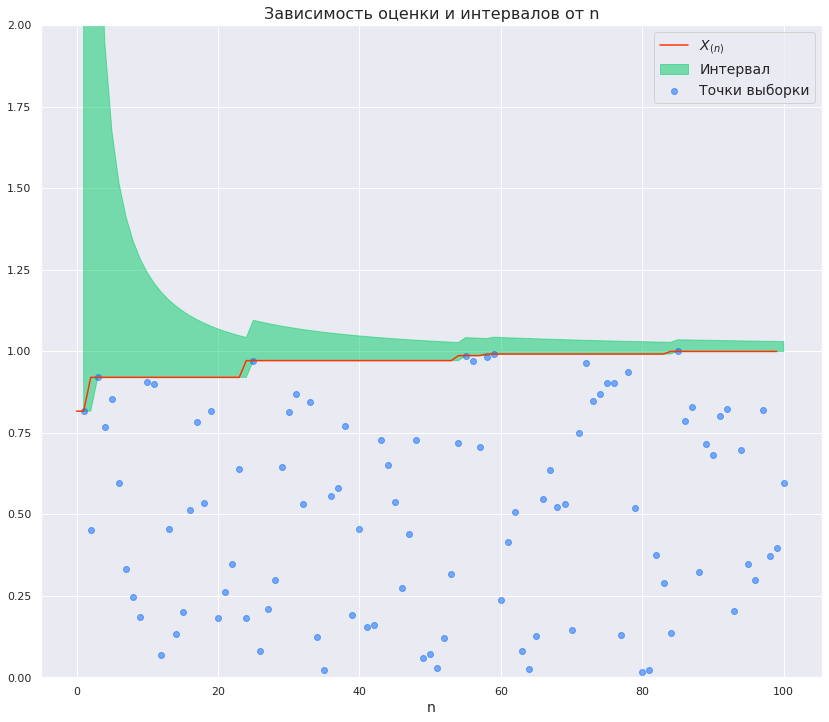

In [9]:
sample = sps.uniform.rvs(size=sample_size)
c_alpha = (1 - alpha)**(-1 / np.arange(1, sample_size + 1))

X_n = np.maximum.accumulate(sample)
left_bounds = X_n
right_bounds = X_n * c_alpha

draw_confidence_interval(left_bounds, right_bounds, X_n, sample,
                         ylim=(0, 2), label_estimation=r'$X_{(n)}$')

**Вывод:** 1) Действительно, в обоих случаях параметр распределения почти всегда лежал внутри интервала.

2) С увеличением числа элементов в выборке информация о распределении становилась всё более полной, поэтому интервал становился всё меньше, тем самым точнее оценивая параметр в смысле диапазона значений.

_________________
### Задача 2.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из распределения $\Gamma(3, 2)$ и постройте доверительные интервалы для следующих случаев:

* точный асимптотический доверительный интервал в параметрической модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно;
* точный асимптотический доверительный интервал для $\theta$ в параметрической модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки наносить на график не нужно. 

**Решение.**

Заметим, что это задание было в дз, поэтому было разобрано на семинаре, поэтому вывод не требуется. Приведём полученные выражения.

1) При $\beta = 2$ имеем: $\left(\frac{2}{\overline{X}}-\frac{z_{\frac{1+\alpha}{2}}\sqrt{2}}{\overline{X}\sqrt{n}}; \frac{2}{\overline{X}}+\frac{z_{\frac{1+\alpha}{2}}\sqrt{2}}{\overline{X}\sqrt{n}}\right)$.

2) При неизвестном $\beta$ имеем: $$
\left(\frac{\overline{X}}{S^2} - \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}\sigma\left(\frac{\overline{X}}{S^2}, \frac{\overline{X}^2}{S^2}\right); \frac{\overline{X}}{S^2} + \frac{z_{\frac{1+\alpha}{2}}}{\sqrt{n}}\sigma\left(\frac{\overline{X}}{S^2}, \frac{\overline{X}^2}{S^2}\right)\right), \sigma^2(\theta, \beta) = \frac{\theta^2 (2\beta + 3)}{\beta}$$.

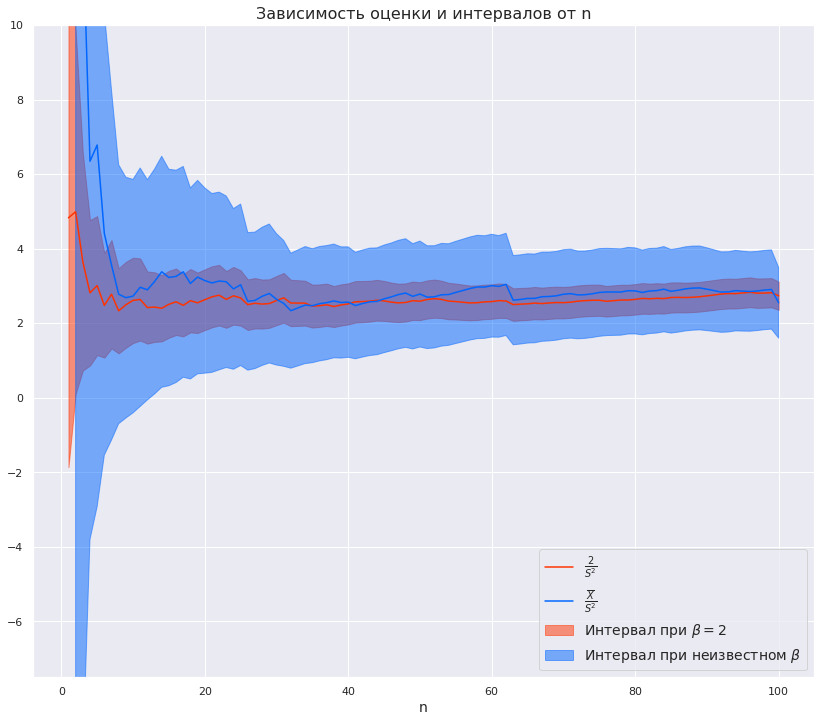

In [11]:
# У меня не получилось придумать, как распространить функцию draw_confidence_interval
# на этот и последующие случаи без большой её переделки.
# Так что настроим стиль графика.))))))))
color1='#FF3300'
color2='#0066FF'
plt.figure(figsize=(14, 12))
plt.xlabel('n', fontsize=14)
plt.ylim(-7.5, 10)
plt.title('Зависимость оценки и интервалов от n', fontsize=16)

sample_size = 100
alpha = 0.95
n = np.arange(1, sample_size + 1)
# В наших обозначениях a := \beta = 2, scale := 1 / \alpha = 1 / 3
sample = sps.gamma.rvs(a=2, scale=1/3, size=sample_size)
z_alpha = sps.norm.ppf((1 + alpha) / 2)

# Посчитаем первый интервал (при известном \beta = 2)
means = sample.cumsum() / n
theta = 2 / means
left_bounds = theta - z_alpha * 2**0.5 / (means * n**0.5)
right_bounds = theta + z_alpha * 2**0.5 / (means * n**0.5)
# Отрисуем этот случай
plt.fill_between(n, left_bounds, right_bounds, alpha=0.5,
                 label=r'Интервал при $\beta=2$', color=color1)
plt.plot(n, theta, label=r'$\frac{2}{S^2}$', color=color1)

# Посчитаем второй интервал (при неизвестном \beta)
def sigma(theta, beta):
    return (theta**2 * (2*beta + 3) / beta)**0.5

mean_squares = (sample**2).cumsum() / n
theta = means / (mean_squares - means**2)
beta = theta * means
sigma_val = sigma(theta, beta)
left_bounds = theta - z_alpha * sigma_val / np.sqrt(n)
right_bounds = theta + z_alpha * sigma_val / np.sqrt(n)

# Отрисуем и этот случай
plt.fill_between(n, left_bounds, right_bounds, alpha=0.5,
                 label=r'Интервал при неизвестном $\beta$', color=color2)
plt.plot(n, theta, label=r'$\frac{\overline{X}}{S^2}$', color=color2)
plt.legend(fontsize=14, loc='lower right');

Сравните полученные интервалы.

**Вывод:** Интервал при известном $\beta$ сильно уже интервала при неизвестном, что вполне логично. Ведь в первом случае информация о выборке полнее, поэтому удаётся с той же вероятностной точностью оценить значения $\theta$ точнее.

__________________
### Задача 3.
Аналогично задаче 1 сгенерируйте выборку $X_1, ... X_{100}$ из стандартного распределения Коши и постройте доверительные интервалы для следующих случаев

* точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ (см. замечание ниже);
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя выборочную медиану;
* точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом, используя асимптотически эффективную оценку.

Изобразите интервалы *на одном* графике полупрозрачными цветами. Точки выборки нужно нанести на график. 

*Замечание.*

Первый пример призван проиллюстрировать, что бывает, если используется неправильная модель. На практике вы никогда не знаете, из какого семейства распределений на самом деле получены данные.

**Решение.**

1) Точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$ есть $\left(\overline{X} - z_{\frac{1+\alpha}{2}}\frac{1}{\sqrt{n}}; \overline{X} + z_{\frac{1+\alpha}{2}}\frac{1}{\sqrt{n}}\right)$.

2) Это было в дз. Точный асимптотический доверительный интервал в параметрической модели распределения Коши со сдвигом есть $\left(\widehat{\mu} - \frac{\pi z_{(1+\alpha) / 2}}{2\sqrt{n}}; \widehat{\mu} + \frac{\pi z_{(1+\alpha) / 2}}{2\sqrt{n}}\right)$.

3) Тут воспользуемся примером из лекции. Заметим, что условия регуляризации L1-L9 выполнены, поэтому одношаговая оценка является а. н. о. для $\theta$, причём асимптотически эффективной. Имеем:$$
\widehat{\theta}_1 = \widehat{\mu} + \frac{\sum\limits_{i=1}^n\frac{X_i - \widehat{\mu}}{1 + \left(X_i - \widehat{\mu}\right)^2}}{\sum\limits_{i=1}^n\frac{1 - \left(X_i - \widehat{\mu}\right)^2}{\left(1 + \left(X_i - \widehat{\mu}\right)^2\right)^2}}, i(\theta) = \frac{1}{2}.$$
В силу определения асимптотически нормальной оценки $\sqrt{n}(\widehat{\theta}_1 - \theta) \overset{d_{\theta}}{\longrightarrow} \mathcal{N}(0, 2)$ можно получить интервал $\left(\widehat{\theta}_1 - \frac{z_{(1+\alpha)/2}\sqrt{2}}{\sqrt{n}}; \widehat{\theta}_1 + \frac{z_{(1+\alpha)/2}\sqrt{2}}{\sqrt{n}}\right)$.

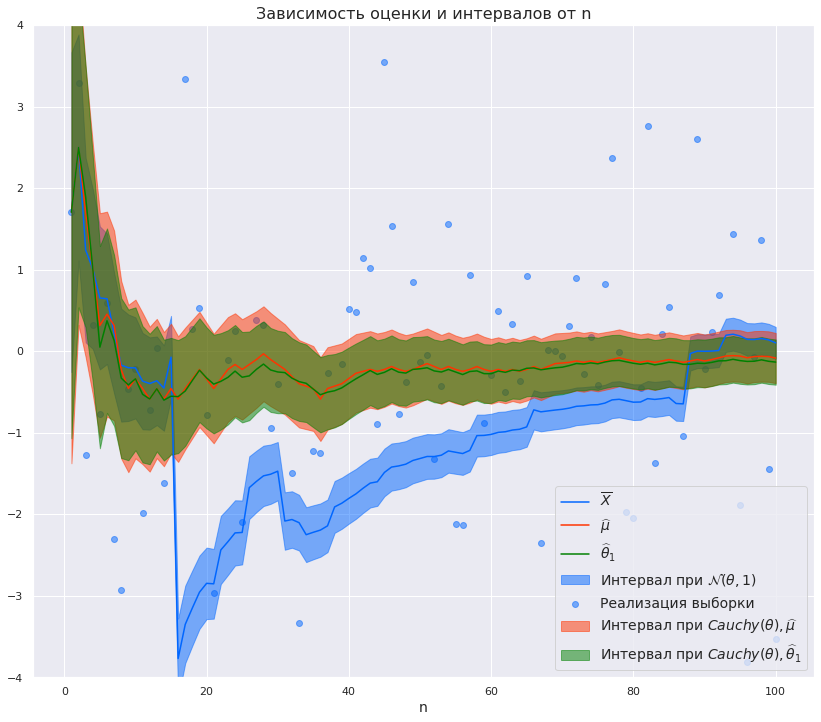

In [20]:
# Настроим стиль графика
color1 = '#FF3300'
color2 = '#0066FF'
color3 = '#00CC66'
plt.figure(figsize=(14, 12))
plt.xlabel('n', fontsize=14)
plt.ylim(-4, 4)
plt.title('Зависимость оценки и интервалов от n', fontsize=16)

sample_size = 100
alpha = 0.95
n = np.arange(1, sample_size + 1)
sample = sps.cauchy.rvs(size=sample_size)
z_alpha = sps.norm.ppf((1 + alpha) / 2)



# Случай 1. Параметрическая модель --- N(𝜃, 1)
means = sample.cumsum() / n
left_bounds = means - z_alpha / np.sqrt(n)
right_bounds = means + z_alpha / np.sqrt(n)
# Отрисуем этот случай
plt.fill_between(n, left_bounds, right_bounds, alpha=0.5,
                 label=r'Интервал при $\mathcal{N}(\theta, 1)$', color=color2)
plt.plot(n, means, label=r'$\overline{X}$', color=color2)
plt.scatter(n, sample, label='Реализация выборки', c=color2, alpha=0.5) # один раз отрисуем



# Случай 2. Параметрическая модель --- Cauchy(𝜃), оценка --- медиана.
medians = np.empty(sample_size)
for i in range(sample_size):
    medians[i] = np.median(sample[:i + 1])
left_bounds = medians - np.pi * z_alpha/2 / np.sqrt(n)
right_bounds = medians + np.pi * z_alpha/2 / np.sqrt(n)
# Отрисуем этот случай
plt.fill_between(n, left_bounds, right_bounds, alpha=0.5,
                 label=r'Интервал при $Cauchy(\theta), \widehat{\mu}$', color=color1)
plt.plot(n, medians, label=r'$\widehat{\mu}$', color=color1)


# Случай 3. Параметрическая модель --- Cauchy(𝜃), оценка --- одношаговая.
mask = np.ones((sample_size, sample_size), dtype=np.bool)
ui = np.triu_indices(sample_size, 1)
mask[ui] = False
# Теперь оставим нужные значения, растянув sample так, чтобы вдоль axis = 0
# шли копии выборки, а вдоль axis = 1 --- сама выборка, и применив mask
sample_prefixes = np.ma.masked_array(np.zeros(sample_size).reshape(-1, 1) + sample, ~mask)
# Если сделать из медиан столбец, то при его вычитании из двумерного массива
# подвыборок медианы как раз растянутся вдоль оси y (axis = 1).
medianed_samples = sample_prefixes - medians.reshape(-1, 1)

numerator = np.sum(medianed_samples / (1 + medianed_samples**2), axis=1)
denominator = np.sum((1 - medianed_samples**2) / (1 + medianed_samples**2)**2, axis=1)
theta1 = medians + numerator / denominator
left_bounds = theta1 - z_alpha * 2**0.5 / np.sqrt(n)
right_bounds = theta1 + z_alpha * 2**0.5 / np.sqrt(n)
# Отрисуем этот случай
plt.fill_between(n, left_bounds, right_bounds, alpha=0.5,
                 label=r'Интервал при $Cauchy(\theta), \widehat{\theta}_1$', color='g')
plt.plot(n, theta1, label=r'$\widehat{\theta}_1$', color='g')
plt.legend(fontsize=14, loc='lower right');

Сравните полученные интервалы.

**Вывод:** 1) Сразу выделяется синий интервал из модели с нормальным распределением. Он может очень резко меняться (в данном случае это происходит, потому что среднее чувствительно к очень большим по модулю значениям). Это вызывает подозрение, что параметрическая модель неправильная.

2) А вот "правильные" интервалы, во-первых, содержат $0$, во-вторых, сужаются с увеличением $n$ (причём сами оценки подходят всё ближе к $0$) в следствие асимптотической природы, в-третьих, границы интервала с одношаговой оценкой чуть-чуть поуже. Это можно объяснить: асимптотическая дисперсия медианы больше, чем у одношаговой $\left(\frac{\pi^2}{4} \text{vs.} 2\right)$ (да и вообще из теоремы с лекции известно, что одношаговая оценка является а. н. о. с минимальной дисперсией при выполнении L1-L9).

__________________
### Задача 4. 

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(a, \sigma^2)$. Постройте точную доверительную область для параметра $\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ для сгенерированной выборки размера $n \in \{5, 20, 50\}$ из стандартного нормального распределения. Подумайте, как лучше разместить графики, чтобы читателю было удобнее воспринимать результаты.

**Решение:**

Это было в дз, приведём результаты. Область будет двумерная, так как параметра два:$$
S_{\sigma}(X) = \left(\sqrt{\frac{nS^2}{\chi^2_{n-1, (1 + \sqrt{\alpha}) / 2}}}; \sqrt{\frac{nS^2}{\chi^2_{n-1, (1 - \sqrt{\alpha}) / 2}}}\right), S_{a}(X) = \left(\overline{X} - z_{(1 + \sqrt{\alpha}) / 2}\frac{\sigma}{\sqrt{n}}; \overline{X} + z_{(1 + \sqrt{\alpha}) / 2}\frac{\sigma}{\sqrt{n}}\right),
$$ где $\chi^2_{n-1, p}$ --- p-квантиль распределения хи-квадрат с $n-1$ степенями свободы.

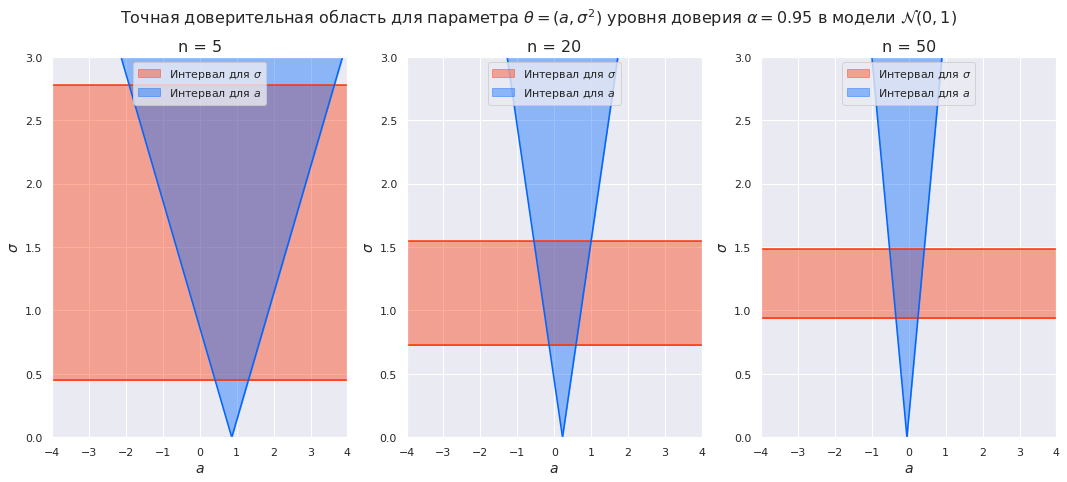

In [88]:
# TODO: сделать функцию
plt.figure(figsize=(18, 7))
color1 = '#FF3300'
color2 = '#0066FF'

alpha= 0.95
chi_palpha = sps.chi2(sample_size - 1).ppf((1 + alpha**0.5) / 2)
chi_malpha = sps.chi2(sample_size - 1).ppf((1 - alpha**0.5) / 2)
z_alpha = sps.norm.ppf((1 + alpha**0.5) / 2)

for (i, sample_size) in [(1, 5), (2, 20), (3, 50)]:
    ax = plt.subplot(1, 3, i)
    sample = sps.norm.rvs(size=sample_size)
    S_squared = (sample**2).mean() - (sample.mean())**2

    left_bound_sigma = (S_squared * sample_size / chi_palpha)**0.5
    right_bound_sigma = (S_squared * sample_size / chi_malpha)**0.5
    sigma_bounds = np.array([0, 3])
    left_bounds_a = sample.mean() - z_alpha / sample_size**0.5 * sigma_bounds
    right_bounds_a = sample.mean() + z_alpha / sample_size**0.5 * sigma_bounds
    
    ax.set_xlabel(r'$a$', fontsize=14)
    ax.set_ylabel(r'$\sigma$', fontsize=14)
    grid = np.linspace(-4, 4, 2)
    ax.hlines(left_bound_sigma, -4, 4, color=color1)
    ax.hlines(right_bound_sigma, -4, 4, color=color1)
    ax.fill_between(grid,  left_bound_sigma, right_bound_sigma,
                    color=color1, alpha=0.4, label=r'Интервал для $\sigma$')
    ax.plot(left_bounds_a, sigma_bounds, color=color2)
    ax.plot(right_bounds_a, sigma_bounds, color=color2)
    ax.fill_betweenx(sigma_bounds, left_bounds_a, right_bounds_a,
                     color=color2, alpha=0.4, label=r'Интервал для $a$')
    ax.legend(loc='upper center')
    ax.set_ylim(0, 3)
    ax.set_xlim(-4, 4)
    ax.set_title('n = {0}'.format(sample_size), fontsize=16)
    
plt.suptitle('Точная доверительная область для параметра ' +\
          r'$\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ ' +\
          r'в модели $\mathcal{N}(a, \sigma^2)$', fontsize=16);

**Вывод:** У графиков специально были сделаны одинаковые масштабы осей, чтобы их удобнее было сравнивать. Хорошо видно, что с увеличением $n$ интервал для $\sigma$ становится меньше, интервал для $a$ при каждом $\sigma$ тоже и, как следствие, область для $\theta$ становится меньше.

__________________
### Задача 5.
 В данном задании вам нужно изучить доверительные интервалы для параметра сдвига в нормальной модели в случае неизвестной дисперсии. Требуется построить: 
 * асимтотический доверительный интервал при помощи центральной предельной теоремы и леммы Слуцкого;
 * точный неасимптотический при помощи распределений хи-квадрат, Стьюдента.

Вывод этих интервалов был разобран на семинарах. Выпишите только ответы.

Асимптотический доверительный интервал: $\left(\overline{X} - z_{\frac{1 + \alpha}{2}}\frac{S}{\sqrt{n}}; \overline{X} + z_{\frac{1 + \alpha}{2}}\frac{S}{\sqrt{n}}\right)$.

Точный доверительный интервал: $\left(\overline{X} - T_{n-1, \frac{1+\alpha}{2}}\frac{S}{\sqrt{n-1}}; \overline{X} - T_{n-1, \frac{1+\alpha}{2}}\frac{S}{\sqrt{n-1}}\right)$, где $T_{n-1, p}$ --- p-квантиль распределения Стьюдента с $n-1$ степенями свободы.

Реализуйте функции построения этих интервалов по выборке. Задокументируйте функции (см. [гайд](https://realpython.com/documenting-python-code/)).

In [108]:
# Названия специально чуть-чуть изменены, чтобы лучше соответствовать смыслу
def calculate_asymptotic_confidence_intervals(sample: np.array, alpha=0.95):
    """Считает асимптотический доверительный интервал уровня доверия alpha
    в нормальной модели в случае неизвестной дисперсии.

    Параметры
    ---------
    sample : np.array
        Содержит выборку, для которой нужно посчитать интервал
    alpha : float, optional
        Уровень доверия интервала

    Возвращает
    ----------
    np.array
        Левые границы интервала для каждой подвыборки sample[0 : i],
        i <= sample_size, где sample_size --- размер выборки
    np.array
        Правые границы интервала для каждой подвыборки sample[0 : i],
        i <= sample_size, где sample_size --- размер выборки
    """
    
    n = np.arange(1, sample.shape[0] + 1)
    means = sample.cumsum() / n
    S = ((sample**2).cumsum() / n - means**2)**0.5
    z_alpha = sps.norm.ppf((1 + alpha) / 2)
    return means - z_alpha * S / n**0.5, means + z_alpha * S / n**0.5

def calculate_confidence_intervals(sample: np.array, alpha=0.95):
    """Считает точный доверительный интервал уровня доверия alpha
    в нормальной модели в случае неизвестной дисперсии.

    Параметры
    ---------
    sample : np.array
        Содержит выборку, для которой нужно посчитать интервал
    alpha : float, optional
        Уровень доверия интервала

    Возвращает
    ----------
    np.array
        Левые границы интервала для каждой подвыборки sample[0 : i],
        i <= sample_size, где sample_size --- размер выборки
    np.array
        Правые границы интервала для каждой подвыборки sample[0 : i],
        i <= sample_size, где sample_size --- размер выборки
    """
    
    n = np.arange(1, sample.shape[0] + 1)
    means = sample.cumsum() / n
    S = ((sample**2).cumsum() / n - means**2)**0.5
    t_alpha = sps.t(df=n-1).ppf((1 + alpha) / 2)
    return means - t_alpha * S / (n - 1)**0.5, means + t_alpha * S / (n - 1)**0.5

Сгенерируйте выборку из нормального расределения и сравните два доверительных интервала в зависимости от размера выборки. Для сравнения отобразите оба интервала на одном графике. Проследите за тем, чтобы было видно, как соотносятся размеры интервалов. Поясните теоретическую причину такого поведения доверительных интервалов.

*Указание*: рассматривайте длину выборки около 20-30.

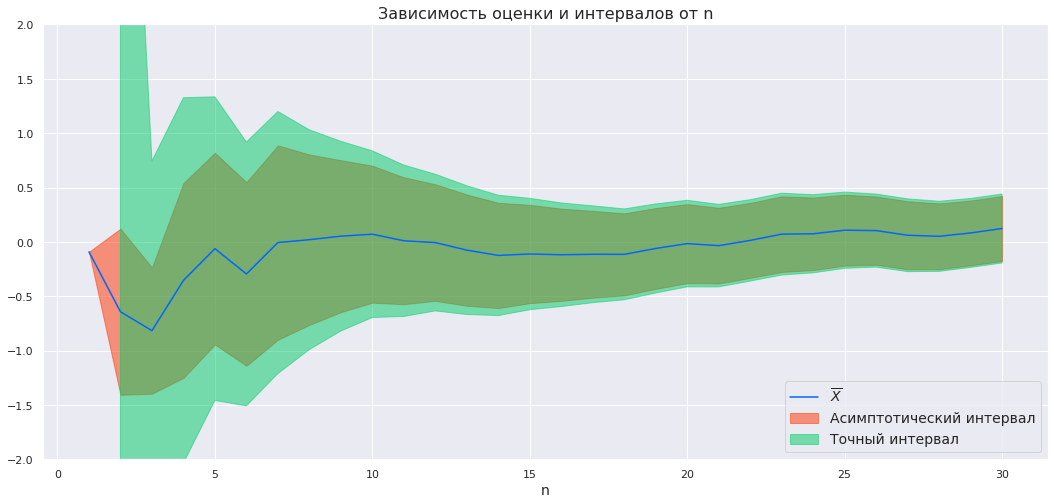

In [101]:
# Настроим стиль графика
color1='#FF3300'
color2='#0066FF'
color3 = '#00CC66'
plt.figure(figsize=(18, 8))
plt.xlabel('n', fontsize=14)
plt.ylim(-2, 2)
plt.title('Зависимость оценки и интервалов от n', fontsize=16)

sample_size = 30
n = np.arange(1, sample_size + 1)
sample = sps.norm.rvs(size=sample_size)

# Получим интервалы
means = sample.cumsum() / n
left_bounds_asympt, right_bounds_asympt =\
calculate_asymptotic_confidence_intervals(sample)
left_bounds, right_bounds = calculate_confidence_intervals(sample)

# Отрисуем полученные интервалы и оценку
plt.fill_between(n, left_bounds_asympt, right_bounds_asympt, alpha=0.5,
                 label=r'Асимптотический интервал', color=color1)
plt.plot(n, means, label=r'$\overline{X}$', color=color2)
plt.fill_between(n, left_bounds, right_bounds, alpha=0.5,
                 label=r'Точный интервал', color=color3)
plt.legend(fontsize=14, loc='lower right');

**Вывод:** так как интервалы различаются отступом от $\overline{X}$, то их очертания одинаковы. Почему же точный интервал содержит в себе асимптотический?

Это можно обосновать теоретически. Дело в том, что в случае точного используются квантили распределения Стьюдента, а не нормального, и в знаменателе $\sqrt{n-1}$, а не $\sqrt{n}$. Вспомнив, что у распределения Стьюдента хвосты "тяжелее", а центр "полегче" в смысле вероятностной массы, нетрудно понять, что его p-квантиль будет подальше от центра, чем у нормального. Более того, $\frac{1}{\sqrt{n-1}} > \frac{1}{\sqrt{n}}$, поэтому точный интервал получается шире. Но, как можно заметить, разница в ширине становится всё меньше и потом сходит на нет. Это происходит потому, что при $n\rightarrow\infty\ \ T_{n-1} "\rightarrow" \mathcal{N}, \frac{1}{\sqrt{n-1}} \rightarrow \frac{1}{\sqrt{n}}$.

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine">`wine dataset`</a> и рассмотрите столбцы `Alcalinity of ash`, `Nonflavanoid phenols`, `Proanthocyanins` и `Hue` для вина *первого типа*. Тип вина указан в первом столбце.

Постройте доверительные интервалы для параметров сдвига каждого из столбцов, предполагая, что столбцы имеют нормальное распределение. Нужно построить доверительные интервалы обоих рассмотренных выше типов. Запишите их в виде таблицы.

In [106]:
from pathlib import Path
path = Path.cwd()
path = path.joinpath('../../data/raw/MatStat5Sem')

col_names = ['Wine Type', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
                'Magnesium', 'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity',
                'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wine_data = pd.read_csv(path.joinpath('wine.data'), names=col_names)
wine_data.head(10)

,Wine Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [109]:
def print_intervals(sample: pd.DataFrame):
    """Печатает асимптотический и точный доверительные интервалы
    уровня доверия alpha = 0.95 для всей выборки в нормальной модели
    в случае неизвестной дисперсии.

    Параметры
    ---------
    sample : pd.DataFrame
        Содержит выборку, для которой нужно посчитать интервалы
    """
    
    left_bounds_asympt, right_bounds_asympt =\
    calculate_asymptotic_confidence_intervals(np.array(sample))
    left_bounds, right_bounds =\
    calculate_confidence_intervals(np.array(sample))
    
    print("Доверительные интервалы для столбца 'Alcalinity of ash':\n",
         'Асимптотический: ({0:.3f}; {1:.3f}),\n'.format(
             left_bounds_asympt[-1], right_bounds_asympt[-1]
         ),
         'Точный: ({0:.3f}; {1:.3f}).'.format(
             left_bounds[-1], right_bounds[-1]
         ))


sample = wine_data[wine_data['Wine Type'] == 1][['Alcalinity of ash',
                                                 'Nonflavanoid phenols',
                                                 'Proanthocyanins', 'Hue']]

print_intervals(sample['Alcalinity of ash'])
print_intervals(sample['Nonflavanoid phenols'])
print_intervals(sample['Proanthocyanins'])
print_intervals(sample['Hue'])

Доверительные интервалы для столбца 'Alcalinity of ash':
 Асимптотический: (16.393; 17.681),
 Точный: (16.374; 17.701).
Доверительные интервалы для столбца 'Alcalinity of ash':
 Асимптотический: (0.272; 0.308),
 Точный: (0.272; 0.308).
Доверительные интервалы для столбца 'Alcalinity of ash':
 Асимптотический: (1.795; 2.004),
 Точный: (1.792; 2.007).
Доверительные интервалы для столбца 'Alcalinity of ash':
 Асимптотический: (1.033; 1.092),
 Точный: (1.032; 1.092).


| Название колонки     | Асимптотический интервал | Точный интервал |
|----------------------|:----------------:|:----------------:|
| Alcalinity of ash    | (16.393; 17.681) | (16.374; 17.701) |
| Nonflavanoid phenols |  (0.272; 0.308)  |  (0.272; 0.308)  |
| Proanthocyanins      |  (1.795; 2.004)  |  (1.792; 2.007)  |
| Hue                  |  (1.033; 1.092)  |  (1.032; 1.092)  |

Наконец, постройте точную доверительную область для параметров сдвига и масштаба для каждого из рассматриваемых столбцов. Для экономии места стройте графики в два столбца. Подумайте, как можно сделать графики информативными.

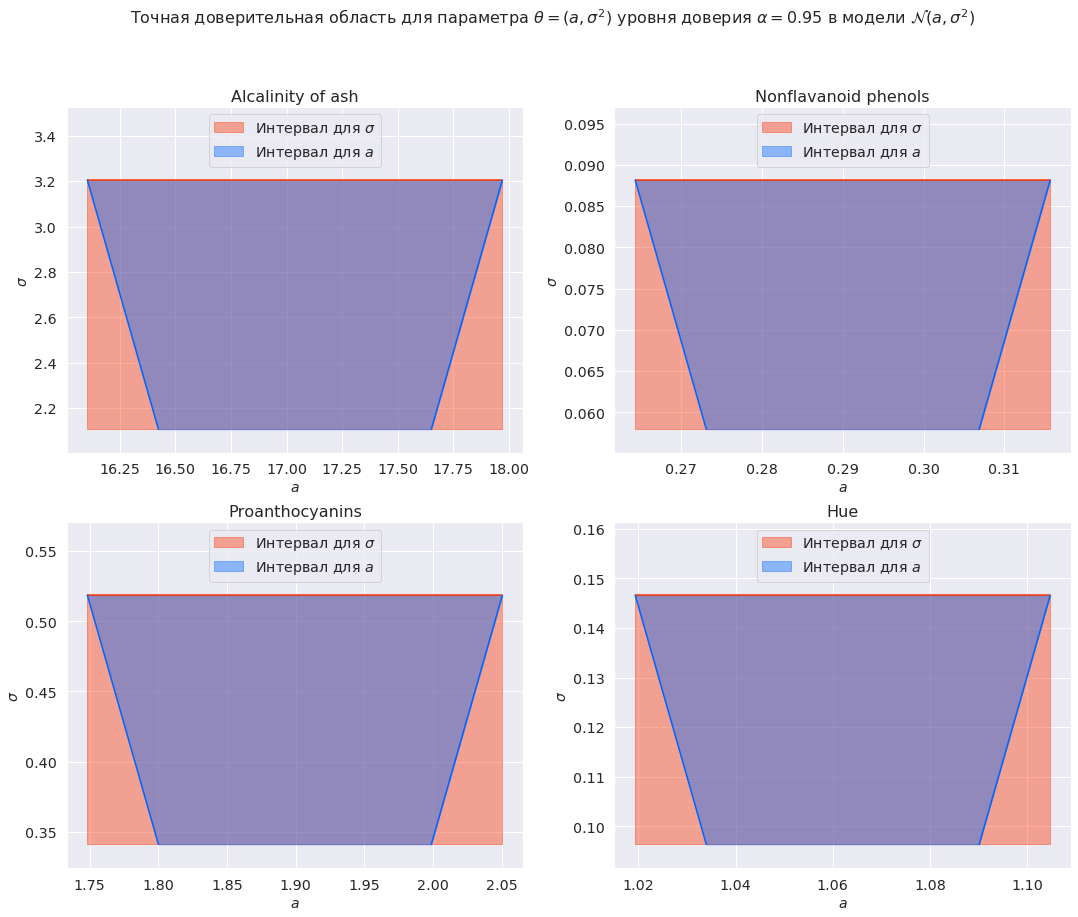

In [116]:
alpha = 0.95
sample_size = sample['Hue'].size # Размер всех колонок одинаковый
chi_palpha = sps.chi2(sample_size - 1).ppf((1 + alpha**0.5) / 2)
chi_malpha = sps.chi2(sample_size - 1).ppf((1 - alpha**0.5) / 2)
z_alpha = sps.norm.ppf((1 + alpha**0.5) / 2)

plt.figure(figsize=(18, 14))
color1 = '#FF3300'
color2 = '#0066FF'


for (i, col_name) in enumerate(sample.columns):
    ax = plt.subplot(2, 2, i + 1)
    column = sample[col_name]
    
    S_squared = (column**2).mean() - (column.mean())**2

    left_bound_sigma = (S_squared * sample_size / chi_palpha)**0.5
    right_bound_sigma = (S_squared * sample_size / chi_malpha)**0.5
    sigma_bounds = np.array([left_bound_sigma, right_bound_sigma])
    left_bounds_a = column.mean() - z_alpha / sample_size**0.5 * sigma_bounds
    right_bounds_a = column.mean() + z_alpha / sample_size**0.5 * sigma_bounds
    
    ax.set_xlabel(r'$a$', fontsize=14)
    ax.set_ylabel(r'$\sigma$', fontsize=14)
    grid = np.linspace(left_bounds_a[1], right_bounds_a[1], 2)
    ax.hlines(right_bound_sigma, left_bounds_a[1], right_bounds_a[1], color=color1)
    ax.fill_between(grid,  left_bound_sigma, right_bound_sigma,
                    color=color1, alpha=0.4, label=r'Интервал для $\sigma$')
    ax.plot(left_bounds_a, sigma_bounds, color=color2)
    ax.plot(right_bounds_a, sigma_bounds, color=color2)
    ax.fill_betweenx(sigma_bounds, left_bounds_a, right_bounds_a,
                     color=color2, alpha=0.4, label=r'Интервал для $a$')
    ax.legend(loc='upper center')
    ax.set_ylim(sigma_bounds[0] - sigma_bounds[0] * 0.05,
                sigma_bounds[1] + sigma_bounds[1] * 0.1)
    # ax.set_xlim(-8, 8)
    ax.set_title(col_name, fontsize=16)
    
plt.suptitle('Точная доверительная область для параметра ' +\
          r'$\theta = (a, \sigma^2)$ уровня доверия $\alpha=0.95$ ' +\
          r'в модели $\mathcal{N}(a, \sigma^2)$', fontsize=16);

In [89]:
pd.set_option('display.precision', 3)
sample.describe()

,Alcalinity of ash,Nonflavanoid phenols,Proanthocyanins,Hue
count,59.000,59.000,59.000,59.000
mean,17.037,0.290,1.899,1.062
std,2.546,0.070,0.412,0.116
min,11.200,0.170,1.250,0.820
25%,16.000,0.255,1.640,0.995
50%,16.800,0.290,1.870,1.070
75%,18.700,0.320,2.090,1.130
max,25.000,0.500,2.960,1.280


**Вывод:** 1) Так как выборка немаленькая, интервалы для каждого из столбца отличаются мало. 

2) Интересно проследить, как соотносятся интервалы из таблицы с областью. Для колонки 'Alcalinity of ash' интервал примерно соответствует значению дисперсии $2.4$, для 'Nonflavanoid phenols' --- примерно $0.065$, для 'Proanthocyanins' --- примерно $0.35$, для 'Hue' --- примерно $0.12$. Значения дисперсии близки к выборочной дисперсии.

__________________
## Байесовский подход

__________________
### Задача 6.

Пусть $X_1, ..., X_n$ — выборка из распределения $\mathcal{N}(\theta, \sigma^2)$ и $\theta$ в качестве априорного распределения имеет стандартное распределение Коши со сдвигом. 

Апостериорное распределение вычисляется по формуле:
$$q\left.(t\,\right|\,x) = \frac {q(t) p_t(x_1) ... p_t(x_n)} {\int\limits_\Theta q(t) p_t(x_1) ... p_t(x_n) dt},$$ 
где $p_t(x)$ — плотность распределения $\mathcal{N}(t, \sigma^2)$, а $q(t)$ — плотность распределения Коши.
Как было сказано на лекции, аналитически интеграл в знаменателе посчитать не удастся. Однако, этот интеграл можно вычислить численно, например, с помощью метода Монте-Карло.

В данном случае, интеграл $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ — некоторая плотность, можно оценить как  $\frac{1}{k}\sum\limits_{j=1}^k f(\xi_i)$, где $\xi_1, ..., \xi_k$ - сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Рассмотрим столбец Alcalinity of ash датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. Постройте гистограмму этого признака. Похоже ли, что наше предпложение о его распределении верно?

Для выборки, образованной эти столбцом посчитайте $c$ — знаменатель в формуле Байеса. Параметры априорного распределения выберите некоторым разумным способом, не опираясь на данные. Для этого рекомендуется поискать  информацию в других источниках и по ней сделать предположение о параметре. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$? 

**Решение:**

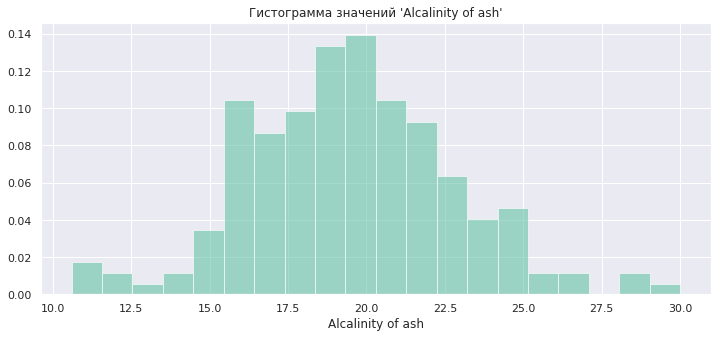

In [91]:
alcalinity = wine_data['Alcalinity of ash']

plt.figure(figsize=(12, 5))
plt.xlabel('Alcalinity of ash')
plt.title("Гистограмма значений 'Alcalinity of ash'")
plt.hist(
    alcalinity_data,
    bins=20,
    density=True,
    alpha=0.6,
);

*Похоже ли, что наше предпложение о его распределении верно?*

*Ответ 1.* В общем и целом это похоже на нормальное распределение.

*Замечание.* Полазив по разным ссылкам, в т. ч. и по предложенной ссылке из дока с вопросами, видим, что значения в основном от $1.3$ до $3.5$ мг/л. Думаю, что под "в основном" можно понимать $95\%$ выборки. Поэтому подберём параметры нормального распределения так, чтобы $\frac{1-\alpha}{2}$-квантиль соответствовал $1.3$, а сдвиг --- $\frac{3.5 + 1.3}{2} = 2.4$. Такой же сдвиг возьмём и для распределения Коши.

Также отметим, что в описании к датасету ничего не сказано, в каких единицах делались измерения, поэтому логично предположить, что в $10^{-4}$ г/л. Так что в качестве loc нужно выбрать $24$, а в качестве квантиля --- $13$.

In [35]:
alpha = 0.95
print('Нужный квантиль нормального распределения: {0:0.3f}'\
      .format(sps.norm(loc=24, scale=5.6).ppf((1 - alpha) / 2)))

Нужный квантиль нормального распределения: 13.024


In [111]:
# Возьмём параметры для априорного распределения и сигма из кода выше.
# Объяснение размера выборки смотрите ниже
sz = 10000
xi = sps.cauchy(loc=24).rvs(size=sz)
sample = np.array(alcalinity, dtype=np.longdouble)

# Честной проверкой было выяснено, что float128 хватает,
# чтобы произведение плотностей не обращалось в 0 для каждого t
f_values = np.prod(sps.norm(loc=xi.reshape(-1, 1), scale=5.6).pdf(sample), axis=1)
c = f_values.mean()
print('Значение интеграла: ', c)

Значение интеграла:  2.0867102841234599873e-220


*Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?*

*Ответ 2.* Стоить уточнить, что значит "большая точность" в данном случае. Смею предположить, что это что-то порядака $0.01$, потому что исходные данные измерены с точностью $0.1$ (судя по последней значащей цифре). Чтобы ошибки метода не влияли существенно на ответ, положим, что нам нужно добиться точности $0.01$. Мы знаем, что скорость сходимости в методе Монте-Карло порядка $n^{-\frac{1}{2}}$, поэтому потребуется $10000$ значений.

Для апостериорного распределения, посчитанного по данной выборке:
* нарисуйте график плотности;
* посчитайте математическое ожидание;
* найдите симметричный 95%-ый доверительный интервал.

Симметричный 95%-ый доверительный интервал, вчисленный с точностью порядка 0.02 равен (18.73; 20.34)
Мат. ож. апостериорного распределения: 19.631


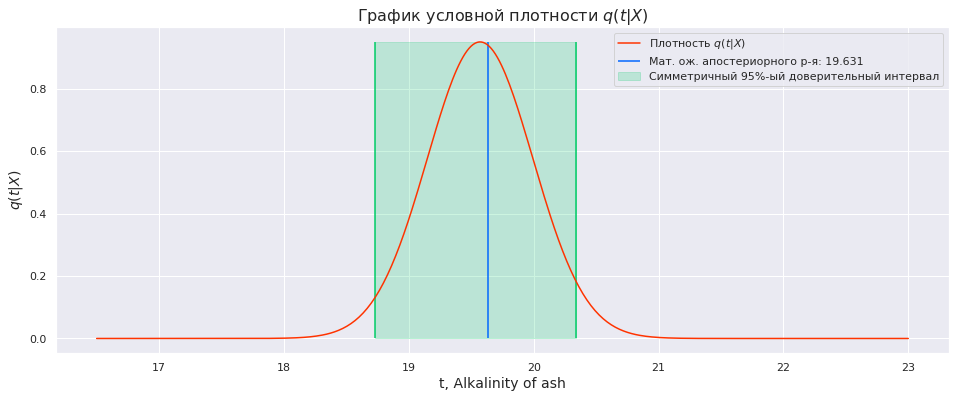

In [115]:
def q_with_respect_to_X(t: np.array, sample: np.array, c: np.longdouble):
    q = sps.cauchy(loc=24).pdf(t) # значения априорной плотности
    return np.prod(
        sps.norm(loc=t.reshape(-1, 1), scale=5.6).pdf(sample),
        axis=1
    ) / c * q

t_min = 16.5
t_max = 23
points_num = 400
t = np.linspace(t_min, t_max, points_num)
vals = q_with_respect_to_X(t, sample, c)
# Будем искать (1 +- alpha) / 2 квантили приближённо.
# Посчитаем по плотности функцию распределения, а по ней найдём уже квантили
alpha = 0.95
step = (t_max - t_min) / points_num
cdf = vals.cumsum() * step
arg_lquantile = cdf[cdf <= (1 - alpha) / 2].size - 1
arg_rquantile = cdf[cdf <= (1 + alpha) / 2].size - 1
lquantile = t_min + step * arg_lquantile
rquantile = t_min + step * arg_rquantile
print('Симметричный 95%-ый доверительный интервал, вчисленный с точностью' +\
     ' порядка {0:.2f} равен ({1:.2f}; {2:.2f})'.format(
    step, lquantile, rquantile
))
# Мат. ожидание найдём тоже численно с помощью метода Монте-Карло
test_t = sps.uniform(loc=18, scale=3).rvs(size=sz)
expect_val = np.sum(test_t * q_with_respect_to_X(test_t, sample, c)) * 3 / sz
print('Мат. ож. апостериорного распределения: {0:.3f}'.format(expect_val))

# Отрисуем найденные значения
color1='#FF3300'
color2='#0066FF'
color3 = '#00CC66'
plt.figure(figsize=(16, 6))
plt.xlabel('t, Alkalinity of ash', fontsize=14)
plt.ylabel(r'$q\left(t\right|X)$', fontsize=14)
plt.title(r'График условной плотности $q\left(t\right|X)$', fontsize=16)
plt.plot(t, vals, label=r'Плотность $q\left(t\right|X)$', color=color1)
plt.vlines(expect_val, 0, vals.max(),
           label='Мат. ож. апостериорного р-я: {0:.3f}'.format(expect_val),
          color=color2)
plt.vlines(lquantile, 0, vals.max(), color=color3)
plt.vlines(rquantile, 0, vals.max(), color=color3)
plt.fill_betweenx([0, vals.max()], lquantile, rquantile, color=color3,
                  alpha=0.2, label='Симметричный 95%-ый доверительный интервал')
plt.legend();

In [121]:
# Приведём выборочное среднее
print('Среднее значение: {0:.3f}'.format(wine_data['Alcalinity of ash'].mean()))

Среднее значение: 19.495


**Вывод:** можем проверить результаты следующим образом. На лекции была теорема о том, что мат. ож. апостериорного распределения асимптотически эквивалентна ОМП при выполнении определённых условий. Так как плотности распределений Коши и нормального удовлетворяют этим условиям, теорема верна.

Что же видим здесь? ОМП для параметра сдвига в модели нормального распределения с известной сигма есть $\overline{X} = 19.5$. Мы же получили значение $E(\theta|X) = 19.6$, что достаточно близко к ОМП, как и должно быть.

__________________
### Задача 7.

Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

**1).** Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как его значения параметров соотносятся с априорными знаниями о монете.
Можно рассмотреть следующие случаи.
* Монета скорее честная. Тогда наиболее вероятны значения $p$ в окрестности $0.5$.
* Монета скорее нечестная, перевес неизвестен. Тогда наименее вероятны значения $p$ в окрестности $0.5$.
* Монета скорее нечестная, перевес в сторону герба. Тогда наиболее вероятны значения $p$ в окрестности $1$.
* Монета скорее честная, либо с небольшим перекосом вправо. Тогда наиболее вероятны значения $p$ в окрестности $\approx 0.6$.
* Ничего не известно. Тогда все значния равновероятны.

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

**Решение:**

Из дз известно, что сопряжённым семейством распределений будет $\mathcal{Q} = \{B(\alpha, \beta) | \beta > 0, \alpha > 0\}$. Тогда в разных случаях имеем разное изменение параметров:
* у плотности бета-распределения должен быть хорошо выраженный максимум около $0.5$. Можно рассмотреть $\alpha = \beta = 5$.
* значения плотности бета-распределения должны увеличиваться от центра к краям. Можно рассмотреть $\alpha = \beta = 0.5$.
* значения плотности бета-распределения должны быть маленькими при $t <= 0.5$ и большими при $t > 0.5$. Можно рассмотреть $\alpha = 5, \beta = 1$.
* у плотности бета-распределения должен быть максимум в районе $t\approx 0.6$. Можно рассмотреть $\alpha = 5, \beta = 2$.
* плотность бета-распределения должна быть константной. Можно рассмотреть $\alpha = \beta = 1$.

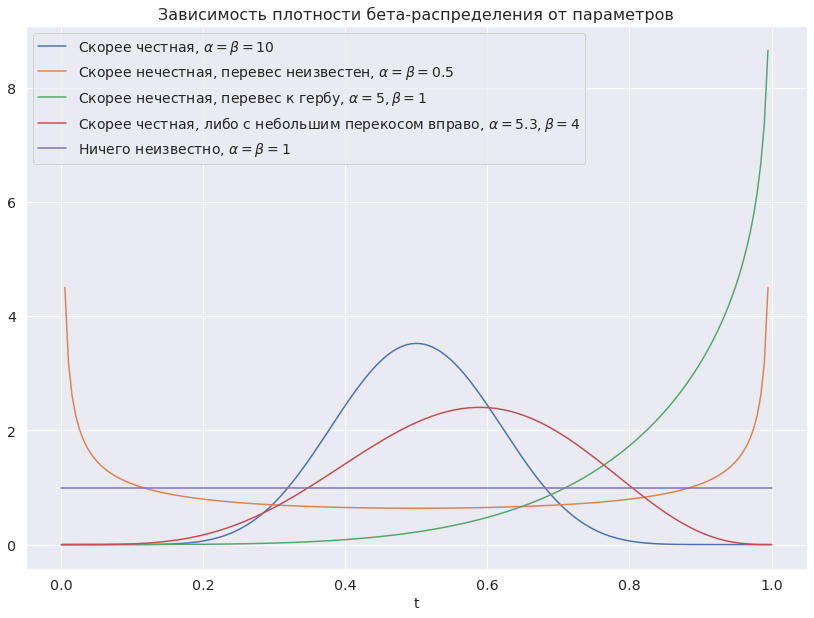

In [97]:
# В таком же порядке имеем
t = np.linspace(0, 1, 200)

set1 = sps.beta(a=10, b=10).pdf(t)
set2 = sps.beta(a=0.5, b=0.5).pdf(t)
set3 = sps.beta(a=5, b=0.8).pdf(t)
set4 = sps.beta(a=5.3, b=4).pdf(t)
set5 = sps.beta(a=1, b=1).pdf(t)

plt.figure(figsize=(14, 10))
plt.xlabel('t', fontsize=14)
plt.title('Зависимость плотности бета-распределения от параметров', fontsize=16)
plt.plot(t, set1, label=r'Скорее честная, $\alpha = \beta = 10$')
plt.plot(t, set2, label=r'Скорее нечестная, перевес неизвестен, $\alpha = \beta = 0.5$')
plt.plot(t, set3, label=r'Скорее нечестная, перевес к гербу, $\alpha = 5, \beta = 1$')
plt.plot(t, set4,label=r'Скорее честная, либо с небольшим перекосом вправо, $\alpha = 5.3, \beta = 4$')
plt.plot(t, set5, label=r'Ничего неизвестно, $\alpha = \beta = 1$')
plt.legend(fontsize=14);

**Вывод:** таким образом, разные параметры априорного распределения соответствуют различным ситуациям в реальности.

Ниже приведена реализация некоторых вспомогательных функций.

In [3]:
def draw_posteriori(grid, distr_class, post_params, xlim=None, case_title=None):
    '''Рисует серию графиков апостериорных плотностей.
    
    :param grid: сетка для построения графика
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    
    sns.set(font_scale=1.3)
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(16, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) \
                     if np.isscalar(post_params[n]) \
                     else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, np.round(post_params[n], 3)), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.title('Апостериорное распределение в зависимости от размера выборки'\
             + (case_title if not isinstance(case_title, type(None)) else ''))
    plt.grid(ls=':')
    plt.legend(fontsize=12)
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, case_title=None, ylim=None):
    '''Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
    
    :param ml: оценка максимального правдоподобия для 1 <= n <= len(sample)
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    
    sns.set(font_scale=1.3, style='whitegrid', palette='Set2')
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) \
                          if np.isscalar(post_params[n]) \
                          else distr_class(*post_params[n]))
    
    plt.figure(figsize=(16, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], 
             label='Bayes', lw=2.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.3)
    plt.plot(np.arange(size)+1, ml, label='MLE', lw=2.5)
    plt.title('Оценки параметра в зависимости от размера выборки' +\
              (case_title if not isinstance(case_title, type(None)) else ''))
    plt.xlabel('Размер выборки')
    plt.grid(ls=':')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [4]:
def bern_posterior_params(sample, a, b):
    '''Находит параметры апостериорного распределения 
        для всех 0 <= n <= len(sample). 
    
    :param sample: выборка
    :param a: параметр alpha априорного распределения
    :param b: параметр beta априорного распределения
    
    :returns: параметры апостериорного
    '''
    
    n = len(sample)
    cumsum = np.hstack(([0], sample.cumsum()))
    params = np.array([a + cumsum,
                       b + np.arange(0, n + 1) - cumsum])
    return params

*Комментарий к коду выше.* Вспомним, что при взятии априорного распределения с параметрами $\alpha, \beta$ апостериорное получится с параметрами $\alpha + \sum_{i=1}^n X_i, \beta + n - \sum_{i=1}^n X_i$.

**2).** Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая — параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

*Замечание*. В дз мы находили ОМП для $\text{Bin}(m, \theta)$ при известном $m$. Так вот, при $m = 1$ имеем: $\widehat{\theta} = \frac{\sum_{i=1}^n X_i}{n} = \overline{X}$.

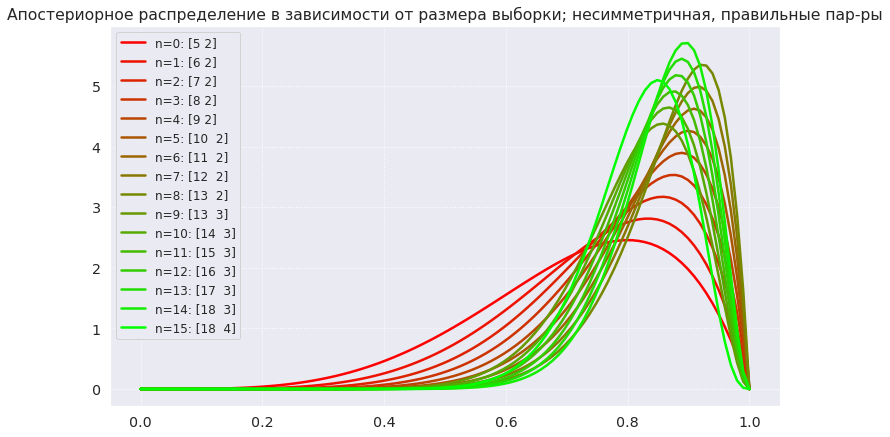

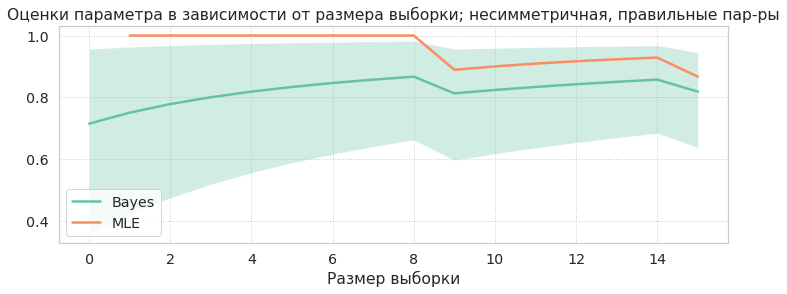

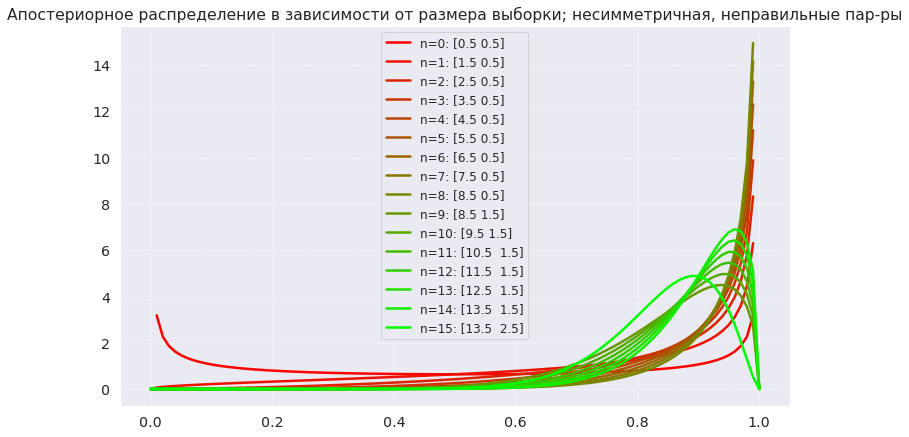

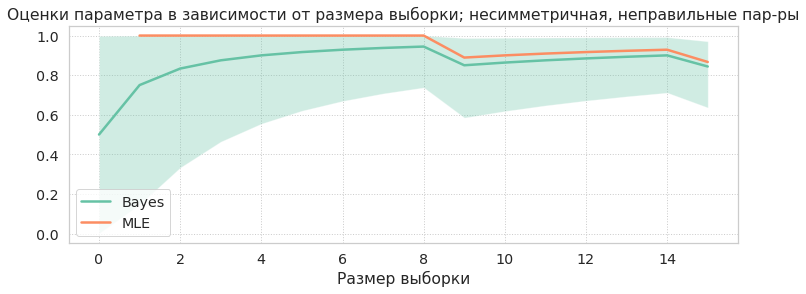

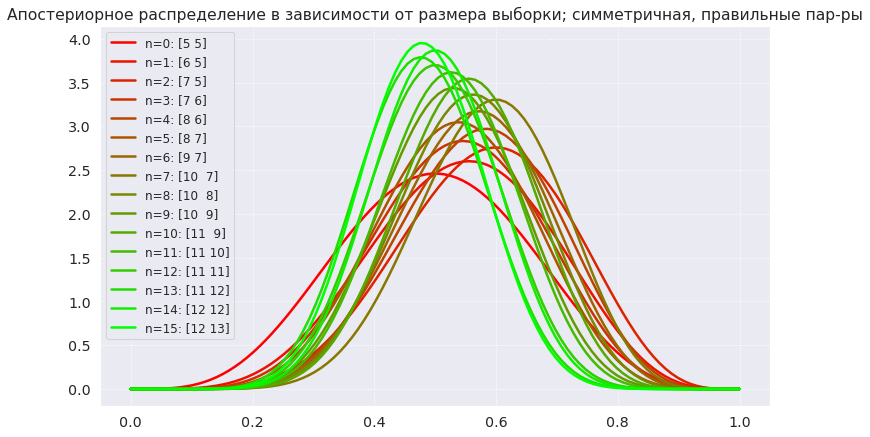

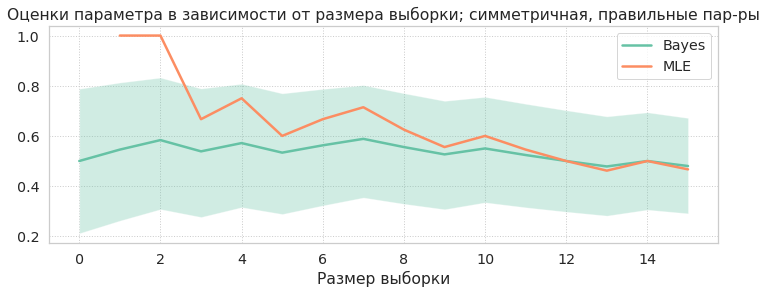

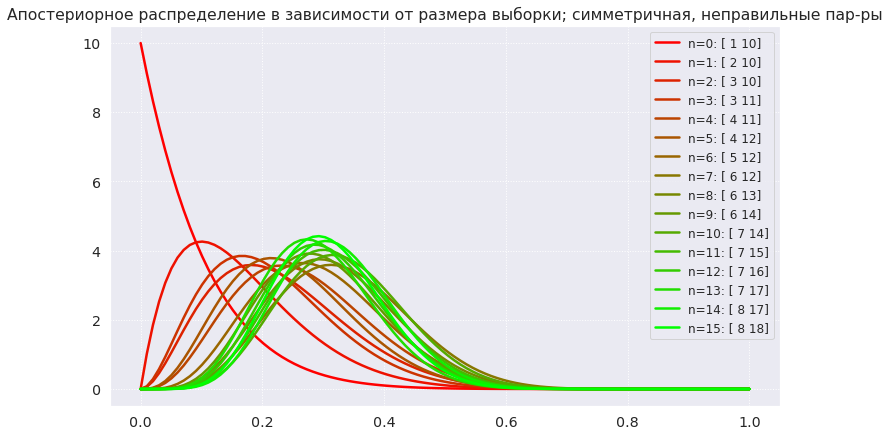

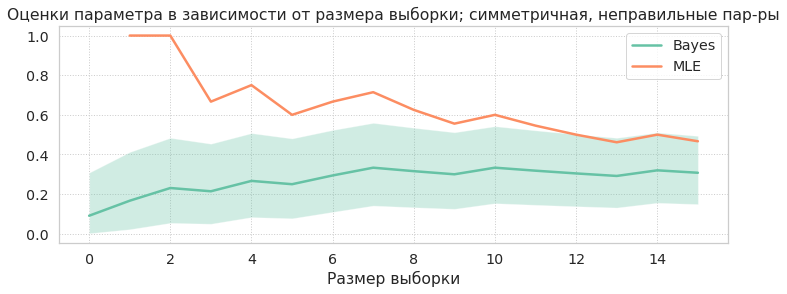

In [151]:
sample_size = 15
# Несимметричная монета
p = 0.8
asymmetric_sample = sps.bernoulli(p=p).rvs(size=sample_size)
ml_asymmetric = asymmetric_sample.cumsum() / np.arange(1, sample_size + 1)
# Симметричная монета
p = 0.5
symmetric_sample = sps.bernoulli(p=p).rvs(size=sample_size)
ml_symmetric = symmetric_sample.cumsum() / np.arange(1, sample_size + 1)

# 1) Для несимметричной монеты рассмотрим случаи:
# 1.1) правильно подобраны параметры: alpha = 5, beta = 2
grid = np.linspace(0, 1, 100)
draw_posteriori(grid, sps.beta,
                bern_posterior_params(asymmetric_sample, 5, 2).T,
                case_title='; несимметричная, правильные пар-ры')
draw_estimations(ml_asymmetric, sps.beta,
                 bern_posterior_params(asymmetric_sample, 5, 2).T,
                 case_title='; несимметричная, правильные пар-ры')
# 1.2) неправильно подобраны параметры: alpha = 5, beta = 5
draw_posteriori(grid, sps.beta,
                bern_posterior_params(asymmetric_sample, 0.5, 0.5).T,
                case_title='; несимметричная, неправильные пар-ры')
draw_estimations(ml_asymmetric, sps.beta,
                 bern_posterior_params(asymmetric_sample, 0.5, 0.5).T,
                 case_title='; несимметричная, неправильные пар-ры')


# 2) Для симметричной монеты рассмотрим случаи:
# 2.2) правильно подобраны параметры: alpha = 5, beta = 5
draw_posteriori(grid, sps.beta,
                bern_posterior_params(symmetric_sample, 5, 5).T,
                case_title='; симметричная, правильные пар-ры')
draw_estimations(ml_symmetric, sps.beta,
                 bern_posterior_params(symmetric_sample, 5, 5).T,
                 case_title='; симметричная, правильные пар-ры')
# 2.2) неправильно подобраны параметры: alpha = 1, beta = 10
draw_posteriori(grid, sps.beta,
                bern_posterior_params(symmetric_sample, 1, 10).T,
                case_title='; симметричная, неправильные пар-ры')
draw_estimations(ml_symmetric, sps.beta,
                 bern_posterior_params(symmetric_sample, 1, 10).T,
                 case_title='; симметричная, неправильные пар-ры')

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия параметра $p$.

**Вывод:** 1) Чем больше размер выборки, тем меньше сказывается зависимость от параметров априорного распределения. Это соответствует и теоретическим результатам: $\sum_{i=1}^n X_i, n - \sum_{i=1}^n X_i$ становятся всё больше, поэтому $\alpha, \beta$ приобретают всё меньшую значимость.

2) Разница между байесовской оценкой и ОМП становится всё меньше с ростом $n$, причём если параметры угаданы правильно, то изначально оценки находятся ближе.

__________________
### Задача 8.
 
Один экзаменатор на экзамене по математической статистике при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ — индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $\min(i+1, 10)$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлениях экзаменатора?
* Нужно ли дружить с таким экзаменатором?

**Решение.**

Априорное знание может основываться на том, сколько баллов заработал студент за семестр: возьмём за $p_0$ = баллы_студента_за_семестр / макс_баллы_за_семестр. Зачем нам байесовский подход? Почему бы сразу не сгенерировать выборку и не получить ответы? Нууу, как минимум оно нужно, потому что экзаменатор так хочет вычислять =), а вообще, может, студент списывал все дз и его не поймали. Вероятность этого мала, но это надо учитывать, поэтому и нужно распределение на $p$.

Сопряжённым семейством является $\mathcal{Q} = \{B(\alpha, \beta)\}.$ Будем подбирать его параметры так, чтобы максимум плотности достигался в $p$, т. е. $p = \frac{\alpha - 1}{\alpha + \beta - 2}$. Потом на каждом ходе будем его изменять и смотреть на $0.95$ квантиль. И далее по алгоритму.

Конкретнее по пунктам:
* 1) Чтобы задавать как можно меньше вопросов, нужно чтобы интервал был как можно меньше, ибо тогда в нём быстрее останется только одно число нужного вида. Тогда нужно подбирать квантили так, чтобы плотность между ними принимала максимально большие значения. На каждом шаге мы можем посчитать моду бета-распределения, поэтому квантили должны лежать по разные стороны от неё. Алогритм для экзаменатора примерно следующий: пусть $f(p) = u_{p + \alpha} - u_p$, где $u_p$ --- p-квантиль бета-распределения, тогда с помощью ```scipy.optimize.minimize()``` можно численно найти минимум этой функции на интервале $\left[0; \frac{\alpha - 1}{\alpha + \beta - 2}\right]$. 2) Так как интервал меньше, число задач будет меньше, поэтому решённые задачи "не успеют" хорошо отразить реальные знания студента, поэтому сильнее будет сказываться влияение изначальных знаний о студенте (априорное распределение). Таким образом, экзаменатор будет ставить оценки, скорее отражающие ожидания экзаменатора, а не реальные знания студента.
* Ниже есть код, который проделывает эксперимент. А в выводе будет ответ на этот вопрос.
* Ответ на этот вопрос будет также дан в выводе, потому что нужно узнать, сколько в среднем будет задаваться вопросов. Если их число будет мало, то сильно будет сказываться мнение экзаменатора о студенте, тогда отличникам дружить выгодно (экзаменатор будет знать, что у них хорошие оценки), а двоечникам дружить невыгодно (экзаменатор будет знать, что у них плохие оценки). Если же количество вопросов будет большим, то там хоть дружи, хоть не дружи, всё равно истина всплывёт.

In [57]:
from scipy.optimize import minimize_scalar

def interval_width(left, a, b):
    """
    Считает ширину доверительного интервала B(a, b) уровня доверия 0.95
    с заданным левым концом.
    
    По left считается соотв. вероятностная масса, к ней прибавляется 0.95,
    чтобы уровень доверия интервала был 0.95. После вычисляется правая граница
    по соотв. значению функции распределения.
    
    Параметры
    ---------
    left : float
        Левая граница дов. интервала
    a : float
        \alpha параметр в B(\alpha, \beta)
    b : float
        \beta параметр в B(\alpha, \beta)
        
    Возвращает
    ----------
    float
        Ширину нужного интервала
    """

    beta = sps.beta(a, b)
    prob_mass = beta.cdf(left)
    return beta.ppf(prob_mass + 0.95) - left

def calc_assessment(posterior_params):
    """
    Считает оценку, поставленную экзаменатором, а также число задач,
    которое потребуется решить студенту, прежде чем экзаменатор определится.
    
    Происходит сужение границ интервала уровня доверия 0.95 до тех пор, 
    пока ширина интервала не становится меньше 0.1. Потом высчитывается 
    итоговая оценка.
    
    Параметры
    ---------
    posterior_params : np.array
        Массив numpy, который построчно содержит параметры бета-распределения,
        посчитанные экзаменатором после очередного ответа студента.
        
    Возвращает
    ----------
    i : int
        Число задач, которое потребуется решить студенту, 
        прежде чем экзаменатор определится.
    left : float
        Левая граница интервала
    right : float
        Правая граница интервала
    float
        Оценка, поставленная экзаменатором.
    """
    
    left = 0.0
    right = 1.0
    alpha = 0.95
    i = 0
    param_cnt = posterior_params.shape[0]
    
    while right - left >= 0.1 and i < param_cnt:
        a = posterior_params[i][0]
        b = posterior_params[i][1]
        beta = sps.beta(a, b)
        
        opt_res = minimize_scalar(
            interval_width,
            bounds=(0, beta.ppf(1 - alpha)),
            method='bounded',
            args=(a, b)
        )
        left = opt_res.x
        right = opt_res.fun + left
        i += 1
    
    return i, left, right, np.floor(right * 10)

def lazy_calc_assessment(posterior_params):
    """
    Лениво считает оценку, поставленную экзаменатором, а также число задач,
    которое потребуется решить студенту, прежде чем экзаменатор определится.
    
    Происходит сужение границ интервала уровня доверия 0.95 до тех пор, 
    пока ширина интервала не становится меньше 0.1. Потом высчитывается 
    итоговая оценка.
    
    В отличие от функции calc_assessment не пытается находить интервал
    минимальной длины, поэтому работает значительно быстрее.
    
    Параметры
    ---------
    posterior_params : np.array
        Массив numpy, который построчно содержит параметры бета-распределения,
        посчитанные экзаменатором после очередного ответа студента.
        
    Возвращает
    ----------
    i : int
        Число задач, которое потребуется решить студенту, 
        прежде чем экзаменатор определится.
    left : float
        Левая граница интервала
    right : float
        Правая граница интервала
    float
        Оценка, поставленная экзаменатором.
    """
    
    left = 0.0
    right = 1.0
    alpha = 0.95
    i = 0
    param_cnt = posterior_params.shape[0]
    
    while right - left >= 0.1 and i < param_cnt:
        left = sps.beta(*posterior_params[i]).ppf((1 - alpha) / 2)
        right = sps.beta(*posterior_params[i]).ppf((1 + alpha) / 2)
        i += 1
    
    return i, left, right, np.floor(right * 10)

Рассмотрим двух студентов: 1) любящий почиллить хорошист, $p = 0.5, p_{01} = 0.8, p_{02} = 0.45$, где $p_{0i}$ --- то самое $p_0$, которое определяет экзаменатор в зависимости от набранных в семестре баллов и своих представлений о студенте; 2) сильный дата саентист, $p = 0.9, p_{01} = 0.95, p_{02} = 0.7$, где $p_{oi}$ определено аналогично.

In [63]:
# Первый студент
p = 0.5
tasks = 500
student = sps.bernoulli(p).rvs(size=tasks)
p01 = 0.8 # Экзаменатор думает, что студент --- отличник
p02 = 0.45 # Экзаменатор думает, что студент должен получить либо 4, либо 5

# Для простоты положим \alpha = 2, тогда, тогда из формулы \beta = 1 / p_o.
# Посмотрим на поставленные оценки и число итераций.
posterior_params = bern_posterior_params(student, 2, 1 / p01).T
i, left, right, assess = calc_assessment(posterior_params)
print('В случае минимального интервала и неправильных пар-в имеем:\n',
      'интервал --- ({0:.5f}, {1:.5f})'.format(left, right),
      'число задач --- {0}, оценка --- {1}'.format(i, assess)
     )
i, left, right, assess = lazy_calc_assessment(posterior_params)
print('В случае неминимального интервала и неправильных пар-в имеем:\n',
      'интервал --- ({0:.5f}, {1:.5f})'.format(left, right),
      'число задач --- {0}, оценка --- {1}'.format(i, assess)
     )

posterior_params = bern_posterior_params(student, 2, 1 / p02).T
i, left, right, assess = calc_assessment(posterior_params)
print('В случае минимального интервала и правильных пар-в имеем:\n',
      'интервал --- ({0:.5f}, {1:.5f})'.format(left, right),
      'число задач --- {0}, оценка --- {1}'.format(i, assess)
     )
i, left, right, assess = lazy_calc_assessment(posterior_params)
print('В случае неминимального интервала и правильных пар-в имеем:\n',
      'интервал --- ({0:.5f}, {1:.5f})'.format(left, right),
      'число задач --- {0}, оценка --- {1}'.format(i, assess)
     )

В случае минимального интервала и неправильных пар-в имеем:
 интервал --- (0.41840, 0.51825) число задач --- 380, оценка --- 5.0
В случае неминимального интервала и неправильных пар-в имеем:
 интервал --- (0.41851, 0.51837) число задач --- 380, оценка --- 5.0
В случае минимального интервала и правильных пар-в имеем:
 интервал --- (0.41698, 0.51695) число задач --- 378, оценка --- 5.0
В случае неминимального интервала и правильных пар-в имеем:
 интервал --- (0.41710, 0.51707) число задач --- 378, оценка --- 5.0


In [65]:
# Второй студент
p = 0.9
tasks = 500
student = sps.bernoulli(p).rvs(size=tasks)
p01 = 0.95 # Экзаменатор думает, что студент работа в Яндексе способствует отлу
p02 = 0.7 # Экзаменатор думает, что работа дата саентистом помешала
          # заботать статы в течение семестра

# Для простоты положим \alpha = 2, тогда, тогда из формулы \beta = 1 / p_o.
# Посмотрим на поставленные оценки и число итераций.
posterior_params = bern_posterior_params(student, 2, 1 / p01).T
i, left, right, assess = calc_assessment(posterior_params)
print('В случае минимального интервала и неправильных пар-в имеем:\n',
      'интервал --- ({0:.5f}, {1:.5f})'.format(left, right),
      'число задач --- {0}, оценка --- {1}'.format(i, assess)
     )
i, left, right, assess = lazy_calc_assessment(posterior_params)
print('В случае неминимального интервала и неправильных пар-в имеем:\n',
      'интервал --- ({0:.5f}, {1:.5f})'.format(left, right),
      'число задач --- {0}, оценка --- {1}'.format(i, assess)
     )

posterior_params = bern_posterior_params(student, 2, 1 / p02).T
i, left, right, assess = calc_assessment(posterior_params)
print('В случае минимального интервала и правильных пар-в имеем:\n',
      'интервал --- ({0:.5f}, {1:.5f})'.format(left, right),
      'число задач --- {0}, оценка --- {1}'.format(i, assess)
     )
i, left, right, assess = lazy_calc_assessment(posterior_params)
print('В случае неминимального интервала и правильных пар-в имеем:\n',
      'интервал --- ({0:.5f}, {1:.5f})'.format(left, right),
      'число задач --- {0}, оценка --- {1}'.format(i, assess)
     )

В случае минимального интервала и неправильных пар-в имеем:
 интервал --- (0.87396, 0.97388) число задач --- 94, оценка --- 9.0
В случае неминимального интервала и неправильных пар-в имеем:
 интервал --- (0.87086, 0.97047) число задач --- 97, оценка --- 9.0
В случае минимального интервала и правильных пар-в имеем:
 интервал --- (0.87313, 0.97235) число задач --- 97, оценка --- 9.0
В случае неминимального интервала и правильных пар-в имеем:
 интервал --- (0.86526, 0.96462) число задач --- 106, оценка --- 9.0


Посчитаем наконец зависимость среднего числа заданных вопросов студентам в зависимости от различных представлений экзаменаторов.

Среднее число решённых задач: 378.40
Средняя оценка: 5.000, её дисперсия: 0.316


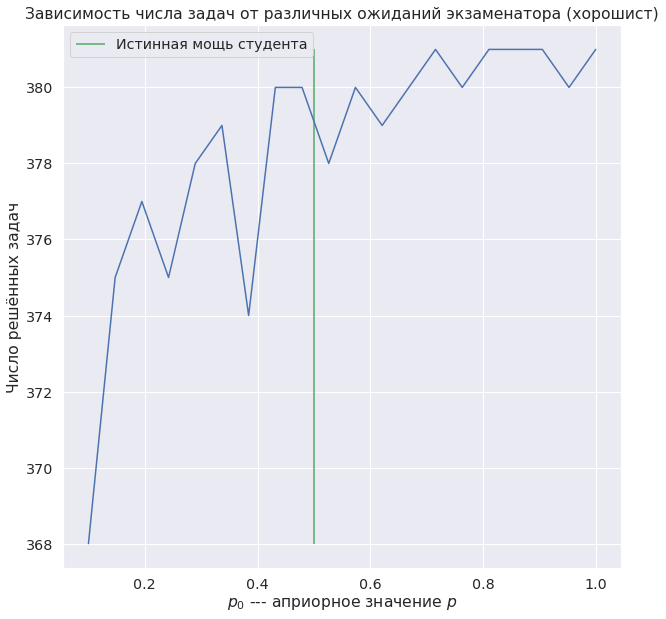

In [94]:
# Первый студент
p = 0.5
tasks = 500
samples_cnt = 20
student = sps.bernoulli(p).rvs(size=(samples_cnt, tasks))
p0 = np.linspace(0.1, 1, samples_cnt) # генерируем разные ожидания от студента

answers_cnt = np.empty(samples_cnt)
assessments = np.empty(samples_cnt)
for i in range(samples_cnt):
    sample = student[i]
    posterior_params = bern_posterior_params(sample, 2, 1 / p0[i]).T
    j, left, right, assess = lazy_calc_assessment(posterior_params)
    answers_cnt[i] = j
    assessments[i] = assess

plt.figure(figsize=(10, 10))
plt.title('Зависимость числа задач от различных ожиданий экзаменатора (хорошист)')
plt.xlabel(r'$p_0$ --- априорное значение $p$')
plt.ylabel('Число решённых задач')
plt.plot(p0, answers_cnt)
plt.vlines(p, answers_cnt.min(), answers_cnt.max(),
           label='Истинная мощь студента', color='g')
plt.legend()
print('Среднее число решённых задач: {0:.2f}'.format(answers_cnt.mean()))
print('Средняя оценка: {0:.3f}, её дисперсия: {1:.3f}'.format(
    assessments.mean(), assessments.std()
))

Среднее число решённых задач: 145.90
Средняя оценка: 8.900, её дисперсия: 0.300


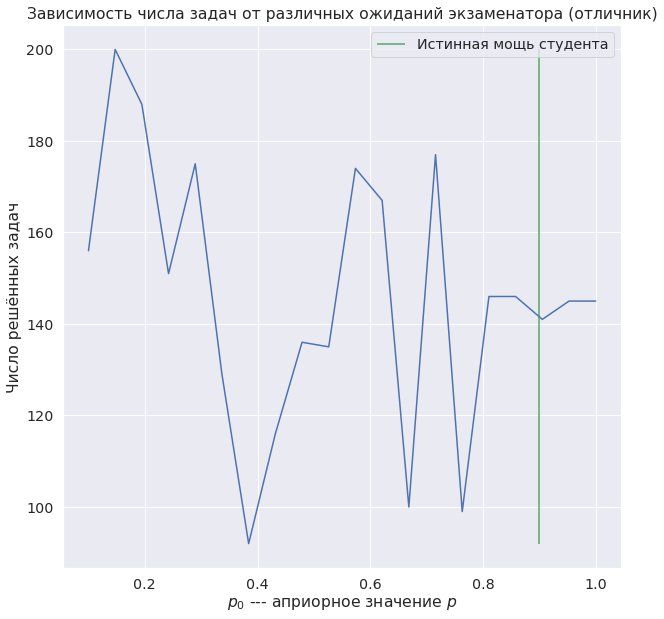

In [93]:
# Второй студент
p = 0.9
tasks = 500
samples_cnt = 20
student = sps.bernoulli(p).rvs(size=(samples_cnt, tasks))
p0 = np.linspace(0.1, 1, samples_cnt) # генерируем разные ожидания от студента

answers_cnt = np.empty(samples_cnt)
assessments = np.empty(samples_cnt)
for i in range(samples_cnt):
    sample = student[i]
    posterior_params = bern_posterior_params(sample, 2, 1 / p0[i]).T
    j, left, right, assess = lazy_calc_assessment(posterior_params)
    assessments[i] = assess
    answers_cnt[i] = j

plt.figure(figsize=(10, 10))
plt.title('Зависимость числа задач от различных ожиданий экзаменатора (отличник)')
plt.xlabel(r'$p_0$ --- априорное значение $p$')
plt.ylabel('Число решённых задач')
plt.plot(p0, answers_cnt)
plt.vlines(p, answers_cnt.min(), answers_cnt.max(),
           label='Истинная мощь студента', color='g')
plt.legend()
print('Среднее число решённых задач: {0:.2f}'.format(answers_cnt.mean()))
print('Средняя оценка: {0:.3f}, её дисперсия: {1:.3f}'.format(
    assessments.mean(), assessments.std()
))

Среднее число решённых задач: 127.95
Средняя оценка: 4.750, её дисперсия: 2.142


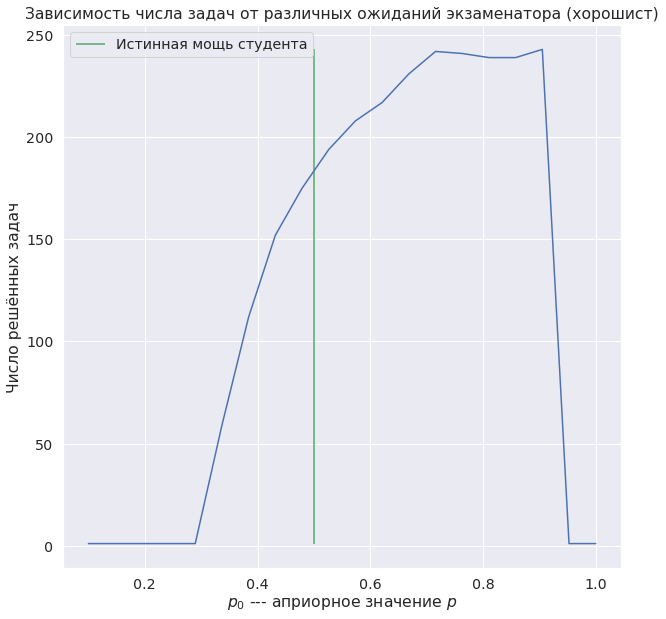

In [92]:
# Первый студент, уменьшим ширину пика апостериорного распределения
p = 0.5
tasks = 500
samples_cnt = 20
student = sps.bernoulli(p).rvs(size=(samples_cnt, tasks))
p0 = np.linspace(0.1, 1, samples_cnt) # генерируем разные ожидания от студента

answers_cnt = np.empty(samples_cnt)
assessments = np.empty(samples_cnt)
for i in range(samples_cnt):
    sample = student[i]
    posterior_params = bern_posterior_params(sample, 100, 99 / p0[i] - 98).T
    j, left, right, assess = lazy_calc_assessment(posterior_params)
    assessments[i] = assess
    answers_cnt[i] = j

plt.figure(figsize=(10, 10))
plt.title('Зависимость числа задач от различных ожиданий экзаменатора (хорошист)')
plt.xlabel(r'$p_0$ --- априорное значение $p$')
plt.ylabel('Число решённых задач')
plt.plot(p0, answers_cnt)
plt.vlines(p, answers_cnt.min(), answers_cnt.max(),
           label='Истинная мощь студента', color='g')
plt.legend()
print('Среднее число решённых задач: {0:.2f}'.format(answers_cnt.mean()))
print('Средняя оценка: {0:.3f}, её дисперсия: {1:.3f}'.format(
    assessments.mean(), assessments.std()
))

Среднее число решённых задач: 143.20
Средняя оценка: 6.900, её дисперсия: 0.300


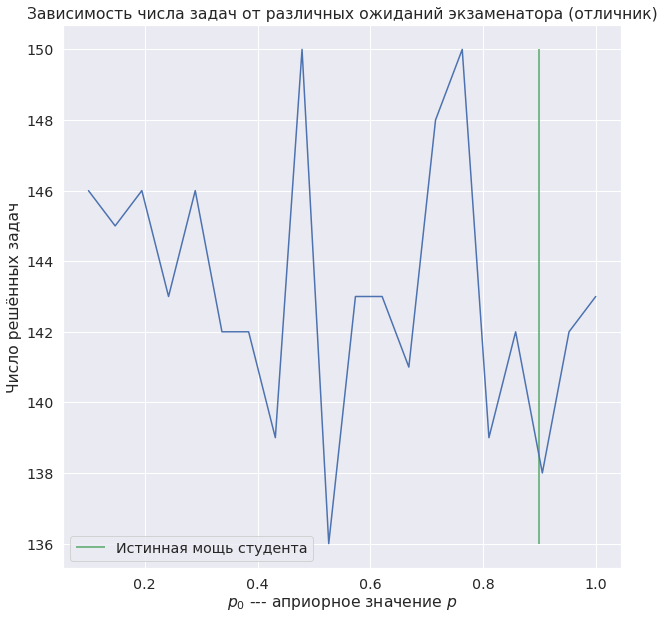

In [95]:
# Второй студент, уменьшим ширину пика апостериорного распределения
p = 0.9
tasks = 500
samples_cnt = 20
student = sps.bernoulli(p).rvs(size=(samples_cnt, tasks))
p0 = np.linspace(0.1, 1, samples_cnt) # генерируем разные ожидания от студента

answers_cnt = np.empty(samples_cnt)
assessments = np.empty(samples_cnt)
for i in range(samples_cnt):
    sample = student[i]
    posterior_params = bern_posterior_params(sample, 100, 100).T
    j, left, right, assess = lazy_calc_assessment(posterior_params)
    assessments[i] = assess
    answers_cnt[i] = j

plt.figure(figsize=(10, 10))
plt.title('Зависимость числа задач от различных ожиданий экзаменатора (отличник)')
plt.xlabel(r'$p_0$ --- априорное значение $p$')
plt.ylabel('Число решённых задач')
plt.plot(p0, answers_cnt)
plt.vlines(p, answers_cnt.min(), answers_cnt.max(),
           label='Истинная мощь студента', color='g')
plt.legend()
print('Среднее число решённых задач: {0:.2f}'.format(answers_cnt.mean()))
print('Средняя оценка: {0:.3f}, её дисперсия: {1:.3f}'.format(
    assessments.mean(), assessments.std()
))

**Вывод:** 1) Удивительно, что минимальность интервала практически не играет роли: число итераций для минимального/неминимального интервала примерно одинаково. В данном случае, в качестве неминимального интервала был рассмотрен $\left(u_{(1 - \alpha) / 2}; u_{(1 + \alpha) / 2}\right)$. Также для меня удивительно, что число задач столь огромно. Чтобы прикинуть среднюю оценку для разных студентов в зависимости от априорного распределения, пришлось использовать только функцию ```lazy_calc_assessment()```, потому что много запусков с оптимизированной функцией не потянется.

2) Во-первых, число итераций зависит от ширины пика бета-распределения, т. е. от доверия экзаменатора оценке за семестр: при изменении ширины пика примерно в $2$ раза число заданных экзаменатором задач снижается примерно в $2$ раза. Но при этом может сильно испортиться качество оценок: дисперсия оценок для третьего графика очень велика по сравнению с остальными (почти в $10$ раз больше, составляет почти половину от средней оценки).

Во-вторых, число заданных задач, как ни странно, практически не зависит от $p_0$, т. е. от представлений о студенте.

В-третьих, если сверху не ограничивать число задаваемых задач, то дружить с таким экзаменатором с целью получения оценки повыше бесполезно: всё равно получишь оценку исходя из умения решать задачи.

__________________
### Задача 9.

Проведите исследование, аналогичное второй части задачи 7 для выборок из распределений:
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

**Решение.**

Вспомним сопряжённые семейства распределений для этих случаев (они были на лекциях/семинарах): для $\mathcal{N}(\theta, 1)$ имеем $\mathcal{Q} = \{\mathcal{N}(a, \sigma^2)\}$, для $Exp(\theta)$ имеем $\mathcal{Q} = \{Г(\alpha, \beta)\}$. Причём апостериорные распределения получаются следующие: для первого случая из $\mathcal{N}(a, \sigma^2)$ получается $a_{apost} = \frac{\sum_{i=1}^n X_i + a / \sigma^2}{n + 1 / \sigma^2}, \sigma_{apost} = \frac{1}{\sqrt{n + 1 / \sigma^2}}, \mathcal{N}(a_{apost}, \sigma^2_{apost})$, а для второго из $Г(\alpha, \beta)$ получается $\alpha_{apost} = \alpha + \sum_{i=1}^n X_i, \beta_{apost} = \beta + n, Г(\alpha_{apost}, \beta_{apost})$.

 Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая — параметры априорного распределения подобраны правильно или неправильно. Постройте графики, воспользовавшись функциями draw_posteriori и draw_estimations.

Для нормального распределения проверим два случая: 1) $(a, \sigma^2)$ соответствуют истинной $\theta$ (т. е. отличие $a$  от $\theta$ малое, порядка $0.1-0.5$, $\sigma$ около $1)$; 2) $(a, \sigma^2)$ не соответствуют истинной $\theta$ (т.е. отличие $a$ от $\theta$ большое, порядка единиц, $\sigma$ либо большое, либо малое).

In [170]:
def norm_posterior_params(sample, a, sigma):
    '''Находит параметры апостериорного распределения 
        для всех 0 <= n <= len(sample) в модели N(a, 1)
    
    :param sample: выборка
    :param a: параметр a априорного распределения N(a, \sigma^2)
    :param sigma: параметр sigma априорного распределения N(a, \sigma^2)
    
    :returns: параметры апостериорного
    '''
    
    n = len(sample)
    cumsum = np.hstack(([0], sample.cumsum()))
    params = np.array(
        [(cumsum + a / sigma**2) / (np.arange(0, n + 1) + 1 / sigma**2),
         1 / (np.arange(0, n + 1) + 1/sigma**2)**0.5]
    )
    return params

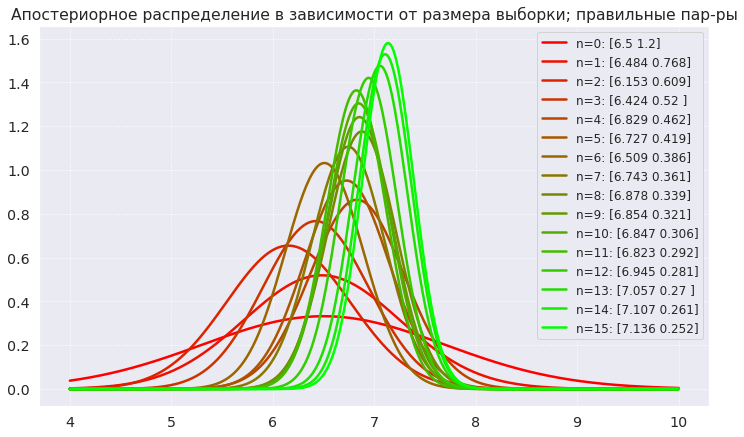

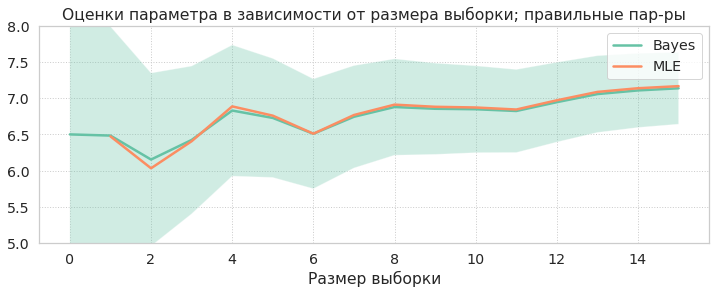

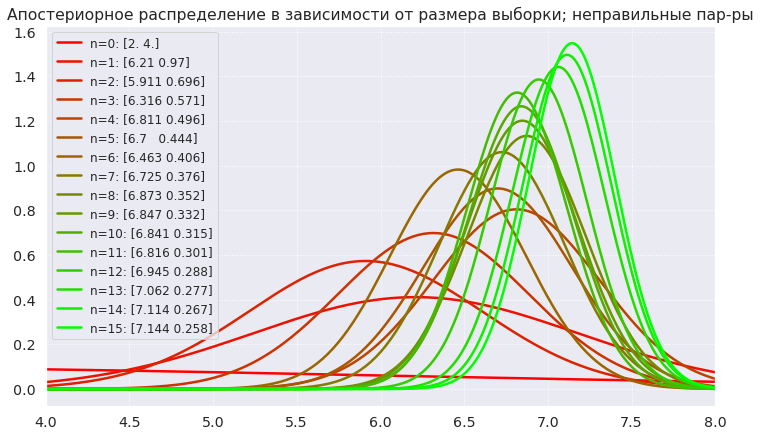

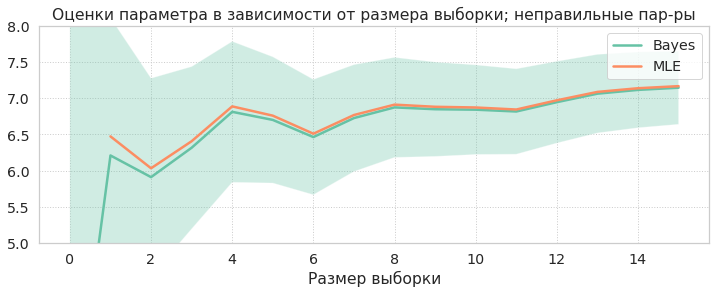

In [173]:
sample_size = 15
a = 7 # положим \theta := a = 7 в N(\theta, 1)
sigma = 1
sample = sps.norm(loc=a, scale=sigma).rvs(size=sample_size)
ml = sample.cumsum() / np.arange(1, sample_size + 1)

# Первый случай, значения априорного будут близки к настоящим
grid = np.linspace(4, 10, 400)
draw_posteriori(grid, sps.norm,
                norm_posterior_params(sample, 6.5, 1.2).T,
                case_title='; правильные пар-ры')
draw_estimations(ml, sps.norm,
                 norm_posterior_params(sample, 6.5, 1.2).T,
                 case_title='; правильные пар-ры', ylim=(5, 8))

# Второй случай, значения априорного будут далеки от настоящих
draw_posteriori(grid, sps.norm,
                norm_posterior_params(sample, 2, 4).T,
                case_title='; неправильные пар-ры', xlim=(4, 8))
draw_estimations(ml, sps.norm,
                 norm_posterior_params(sample, 2, 4).T,
                 case_title='; неправильные пар-ры', ylim=(5, 8))

Аналогично первому этапу, проверим два случая для экспоненциального распределения: 1) $\alpha, \beta$ соответствуют истинному значению $\theta$ (т. е. максимум плотности гамма-распределения хорошо выделяется, её argmax примерно равен $\theta$); 2) $\alpha, \beta$ не соответствуют истинному значению $\theta$ (т. е. максимум плотности гамма-распределения плохо выделяется и/или находится далеко $\theta$).

In [260]:
def exp_posterior_params(sample, k, theta):
    '''Находит параметры апостериорного распределения 
        для всех 0 <= n <= len(sample) в модели Exp(\theta).
        
    В нашей нотации гамма-распределение записывается как Г(\alpha, \theta).
    Чтобы построить соответствие с нотацией википедии, нужно сделать переход
    Г(k, \theta) = Г(\beta, 1 / \alpha).
    
    :param sample: выборка
    :param k: параметр k априорного распределения Г(k, \theta)
    :param k: параметр \theta априорного распределения Г(k, \theta)
    
    :returns: параметры апостериорного в нотации sps.gamma
    '''
    
    n = len(sample)
    cumsum = np.hstack(([0], sample.cumsum()))
    
    # Во-первых, нужно добавить массив loc-ов, если мы не хотим возиться
    # с пробрасыванием параметров через конструктор sps.gamma()
    loc = np.zeros(n + 1)
    # Во-вторых, наша нотация отличается от нотации википедии, 
    # поэтому делаем переход
    alpha = 1 / theta
    beta = k
    # В-третьих, sps.gamma через нашу нотацию запишется след. образом:
    # \alpha = 1 / scale, \beta = a
    scale = 1 / (alpha + cumsum)
    a = beta + np.arange(0, n + 1)
    params = np.vstack((a, loc, scale)).T
    return params

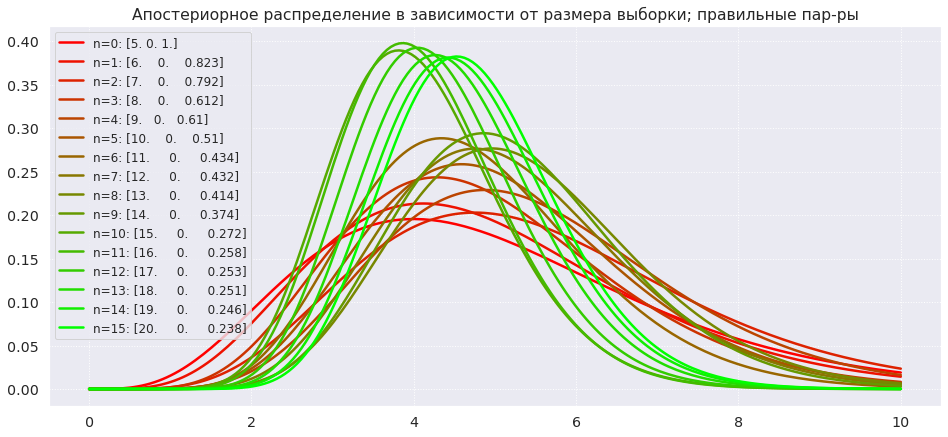

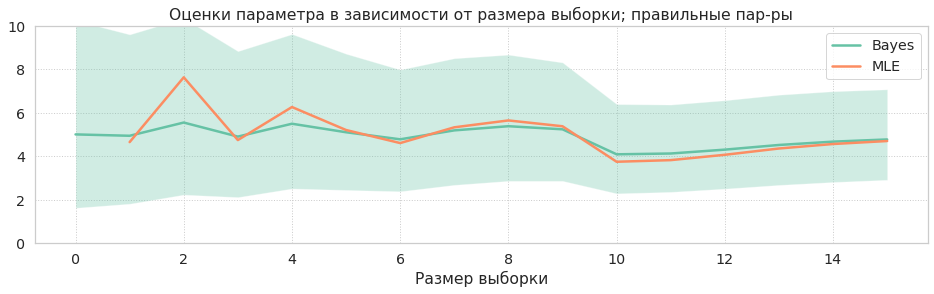

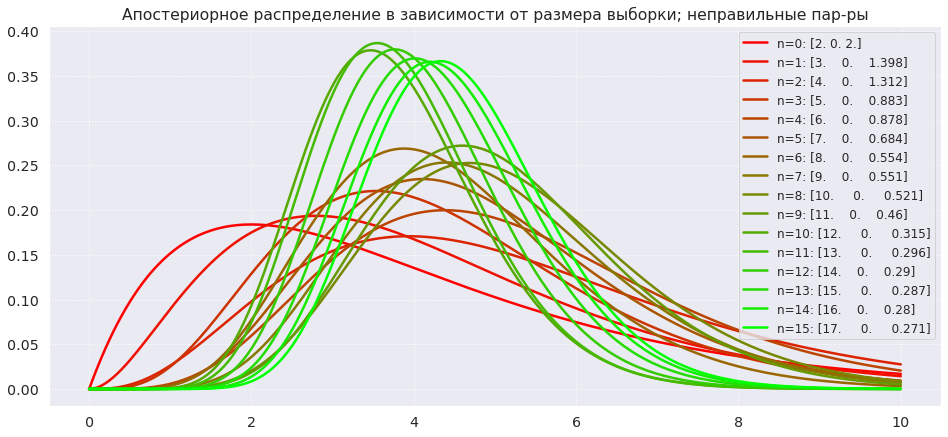

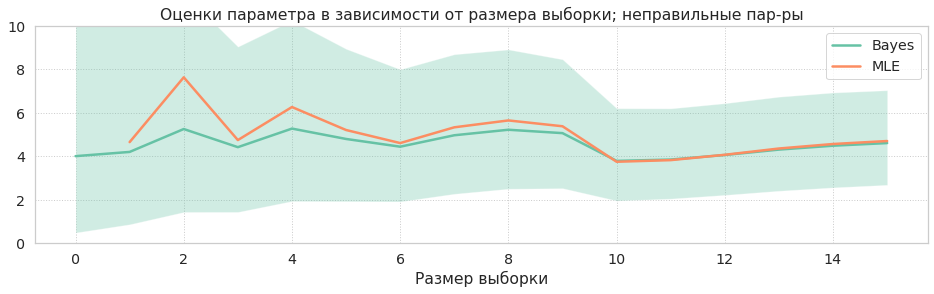

In [262]:
sample_size = 15
theta = 4 # положим \theta := 4 в Exp(\theta)
sample = sps.expon(scale=1/theta).rvs(size=sample_size) # не забыли, что в sps.exp другая нотация
ml = (sample.cumsum() / np.arange(1, sample_size + 1))**(-1)

# Первый случай, значения априорного будут близки к настоящим
grid = np.linspace(0, 10, 200)
draw_posteriori(grid, sps.gamma,
                exp_posterior_params(sample, 5, 1),
                case_title='; правильные пар-ры')
draw_estimations(ml, sps.gamma,
                 exp_posterior_params(sample, 5, 1), ylim=(0, 10),
                 case_title='; правильные пар-ры')

# Второй случай, значения априорного будут далеки от настоящих
draw_posteriori(grid, sps.gamma,
                exp_posterior_params(sample, 2, 2),
                case_title='; неправильные пар-ры')
draw_estimations(ml, sps.gamma,
                 exp_posterior_params(sample, 2, 2), ylim=(0, 10),
                 case_title='; неправильные пар-ры')

**Вывод:** 1) Удивительно! Я бы назвал это самообучаемостью: в процессе увеличения выборки параметры сами всё лучше и лучше подстраиваются так, чтобы максимум был в $a = 7$ (в модели с нормальным распределением) и $\theta = 4$ (в модели с экспоненциальным распределением).

2) Аналогичный № 7 вывод: во-первых, параметры априорного распределения влияют на апостериорную плотность, но с увеличением размера это влияение становится всё менее заметным; поэтому в случае неправильных параметров всё равно под конец максимум получается в нужном месте; во-вторых, байесовская оценка и ОМП с увеличением $n$ различаются всё меньше и сходятся к истинному значению.

__________________
## Baltic Macoma

__________________
### Задача 10.

Пуассоновское распределение обычно используется для моделирования количества событий в некоторый отрезок времени или для моделирования количества объектов в некоторой области в предположении, что события или объекты появляются случайно и независимо. В курсе случайных процессов вы изучите пуассоновские процессы и поймете их связь с экспоненциальным распределением.

Пуассоновское распределение, завышенное в нуле (zero-inflated Poisson distribution), используется для моделирования случаев, в которых наблюдается завышенное содержание нулевых исходов. Например, число страховых исков в рамках населения будет иметь завышенное в нуле распределение из-за наличия тех людей, которые не оформили страховку.

Рассмотрим данные о колличествах балтийской макомы — вид морских двустворчатых моллюсков из семейства теллинид, распространенного в северной части Атлантического и Тихого океана. В результате проведенных исследований оказалось, что во многих локациях численность видов равна нулю, поэтому стоит ожидать, что данные имеют пуассоновское распределение, завышенное в нуле.

Загрузите данные из файла `macoma.csv` и выберите столбец `macoma`. Постройте по данным гистограмму.

*Внимание!* Поскольку распределение дискретно, бины гистограммы должны соответствовать значениям величины. Для этого воспользуйтесь функцией `plt.hist(sample, range=(0, N), bins=N)`.

In [100]:
from pathlib import Path
path = Path.cwd()
path = path.joinpath('../../data/raw/MatStat5Sem')

macoma_data = pd.read_csv(path.joinpath('macoma.csv'), index_col=0)
macoma_data.head(10)

,macoma,mgs,silt,grid,depth,oost,noord,x,y
1,0,169.2,2.85,regular,-75,1340.045540,5720.362415,134004.553968,572036.241511
2,0,181.1,4.28,regular,-80,1340.025369,5715.725490,134002.536870,571572.548976
3,0,194.6,13.40,regular,4,1225.610932,5705.786331,122561.093158,570578.633141
4,0,201.7,6.93,regular,-10,1230.743540,5705.752114,123074.353977,570575.211444
5,0,194.1,5.11,regular,-8,1235.987730,5705.717717,123598.772994,570571.771745
6,0,190.5,5.86,regular,-27,1241.120343,5705.684604,124112.034325,570568.460417
7,0,172.3,6.13,regular,14,1241.152386,5710.692426,124115.238560,571069.242573
8,0,172.8,4.10,regular,-16,1246.396037,5710.659159,124639.603670,571065.915886
9,0,187.5,3.83,regular,-40,1246.364539,5705.651335,124636.453857,570565.133486
10,0,173.3,3.48,regular,-19,1251.639690,5710.626462,125163.968966,571062.646186


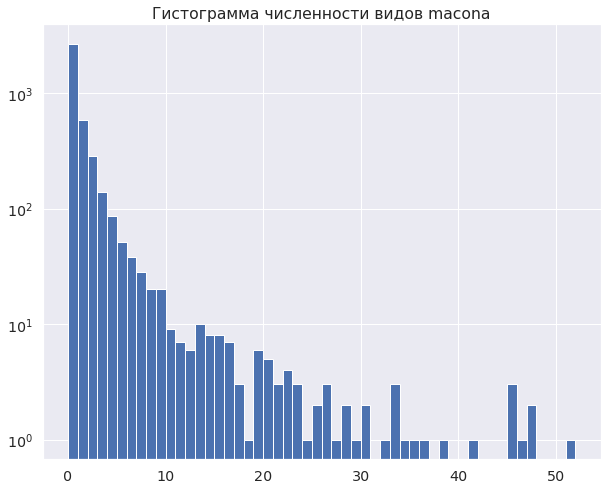

In [155]:
macoma = macoma_data['macoma']
N = macoma_data['macoma'].unique().size

plt.figure(figsize=(10, 8))
plt.hist(macoma, range=(0, N), bins=N, log=True)
plt.title('Гистограмма численности видов macona');

Из теоретического домашнего задания вам известен метод поиска оценки максимального правдоподобия параметров распределения. Выпишите готовые формулы:

**Ответ:**

Пусть распределение имеет параметры $\varepsilon, \lambda: p_{\varepsilon, \lambda} = \begin{cases}\varepsilon + (1 - \varepsilon)e^{-\lambda}, & x = 0;\\ (1 - \varepsilon)\frac{\lambda^x e^{-\lambda}}{x!}, & x \ge 1.\end{cases}$
Тогда в дз было получено, что $$
\lambda_0 = \frac{\overline{X^2}}{\overline{X}} - 1 - \text{а. н. о. } \lambda.\\
\frac{\partial l_X(\theta)}{\partial\lambda} = -n + \frac{\sum_{i=1} ^{n-n_0} Y_i}{\lambda} + \frac{n_0\varepsilon}{\varepsilon+(1-\varepsilon)e^{-\lambda}}, \frac{\partial^2 l_X(\theta)}{\partial\lambda^2} = -\frac{\sum_{i=1} ^{n-n_0} Y_i}{\lambda^2} + \frac{n_0\varepsilon(1 - \varepsilon)e^{-\lambda}}{(\varepsilon + (1 - \varepsilon)e^{-\lambda})^2}.\\
\widehat{\lambda}_{k+1} = \widehat{\lambda}_k - \frac{\frac{\partial l_X(\theta)}{\partial\lambda}}{\frac{\partial^2 l_X(\theta)}{\partial \lambda^2}}\bigg|_{\lambda = \widehat{\lambda}_k, \varepsilon = \widehat{\varepsilon}_k}, \widehat{\varepsilon}_{k+1} = \frac{n_0 - n e^{-\widehat{\lambda}_{k+1}}}{n(1 - e^{-\widehat{\lambda}_{k+1}})},
$$ где $Y_i$ --- ненулевые элементы, $n_0$ --- число нулей в выборке.

Реализуйте метод для выданных данных. Постройте графики траекторий значений параметров в зависимости от номера итерации метода. Зависит ли результат от начального приближения?

4.700504240855644


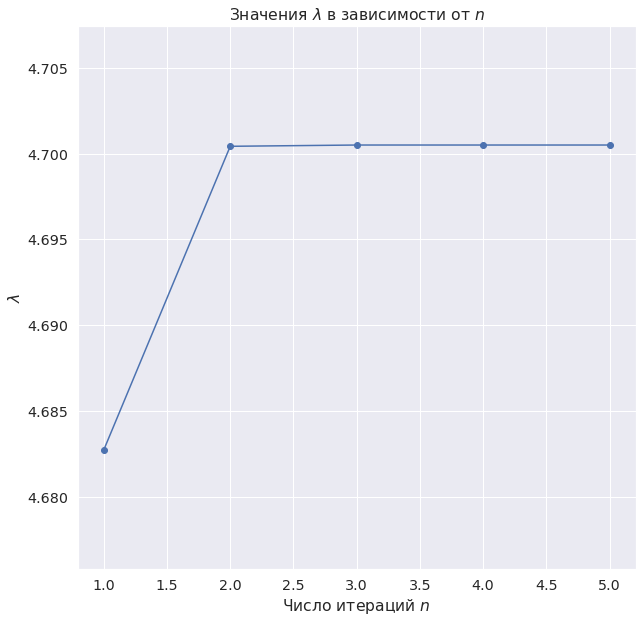

In [184]:
sample_sum = macoma.sum()
n = macoma.size
n_0 = macoma[macoma == 0].size
lambd = 5 # Начальное приближение
eps = (n_0 - n * np.exp(-lambd)) / (n * (1 - np.exp(-lambd)))

max_iters = 5
epsilons = np.empty(max_iters)
lambdas = np.empty(max_iters)
for k in range(max_iters):
    partial_l = -n + sample_sum / lambd +\
    n_0*eps / (eps + (1 - eps)*np.exp(-lambd))
    double_partial_l = -sample_sum / lambd**2 + n_0 * eps * (1 - eps) *\
    np.exp(-lambd) / (eps + (1 - eps) * np.exp(-lambd))**2
#     print(-sample_sum / lambd**2 + n_0 * eps * (1 - eps) * np.exp(-lambd) / (eps + (1 - eps) * np.exp(-lambd))**2)
#     partial_l = n_0 * (eps - 1) * np.exp(-lambd) / (eps + (1 - eps) * np.exp(-lambd)) +\
#     sample_sum / lambd - (n - n_0)
#     double_partial_l = -n_0 * (eps - 1) * np.exp(lambd) /\
#     (eps * np.exp(lambd) + 1 - eps)**2 - sample_sum / lambd**2
#     print(double_partial_l)
    
    lambd = lambd - partial_l / double_partial_l
    eps = (n_0 - n * np.exp(-lambd)) / (n * (1 - np.exp(-lambd)))
    lambdas[k] = lambd
    epsilons[k] = eps
    
# print(lambdas, '\n', epsilons)
    
plt.figure(figsize=(10, 10))
plt.title(r'Значения $\lambda$ в зависимости от $n$')
plt.ylabel(r'$\lambda$')
plt.xlabel(r'Число итераций $n$')
plt.scatter(np.arange(1, max_iters + 1), lambdas)
plt.plot(np.arange(1, max_iters + 1), lambdas)
print(lambdas[-1])

0.6560943095602703


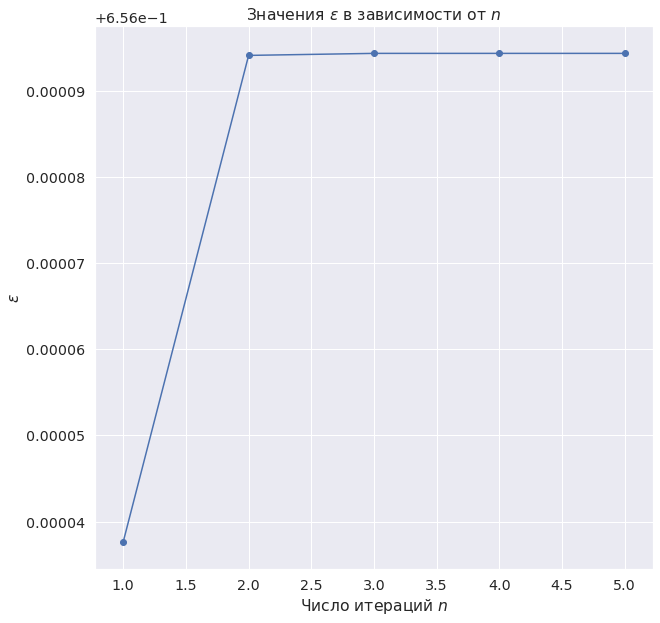

In [185]:
plt.figure(figsize=(10, 10))
plt.title(r'Значения $\varepsilon$ в зависимости от $n$')
plt.ylabel(r'$\epsilon$')
plt.xlabel(r'Число итераций $n$')
plt.plot(np.arange(1, max_iters + 1), epsilons)
plt.scatter(np.arange(1, max_iters + 1), epsilons)
print(epsilons[-1])

**Ответ.** 1) Да, результат зависит от начального приближения.

2) Полученные значения: $\lambda = 4.7, \varepsilon = 0.656$.

Чтобы убедиться, что вы нашли правильное решение, посчитайте значения логарифмической функции правдоподобия по двумерной сетке значений параметров $(\varepsilon, \lambda)$ и найдите максимум, используя функцию `cool_argmax` из предыдущего задания. Сравните его со значением, найденным ранее.

In [221]:
def cool_argmax(array):
    return np.unravel_index(np.argmax(array), array.shape)

def zero_inflated_poisson_logpdf(lambd, eps, sample):
    zero_infl = np.double(sample == 0) * eps
    ordinary_pdf = sps.poisson(lambd).pmf(sample)
    return np.log(zero_infl + (1 - eps) * ordinary_pdf)

In [222]:
lambd_limits = [0.1, 10]
cur_lambd = 0.1
eps_limits = [0.1, 10]
cur_eps = 0.1
# Найдём с точностью 10^{-3}.
# Потребуется 4 итерации, так как сначала нужно ещё определить рязряд единиц
for i in range(1, 4):
    grid = np.mgrid[lambd_limits[0]:lambd_limits[1]:10j,
                    eps_limits[0]:eps_limits[1]:10j]
    logpdf = np.empty(shape=(10, 10))
    for j in range(10):
        for k in range(10):
            logpdf[j][k] = np.sum(zero_inflated_poisson_logpdf(
                grid[0][j][k], grid[1][j][k], macoma
            ))
    # print(logpdf)
    argmax = cool_argmax(logpdf)
    cur_lambd = grid[0][argmax]
    cur_eps = grid[1][argmax]
    # print(cur_lambd, cur_eps)
    lambd_limits = [cur_lambd - 10**(-i), cur_lambd + 10**(-i)]
    eps_limits = [cur_eps - 10**(-i), cur_eps + 10**(-i)]
    
print('Параметры, подобранные с точностью до 10^(-3):',
      'lambda = {0:.3f}, epsilon = {1:.3f}'.format(cur_lambd, cur_eps))

Параметры, подобранные с точностью до 10^(-3): lambda = 0.012, epsilon = 1.090


**Ответ:** Почему не сходится???????????????((((((((((((((((

Распределение с подобранными параметрами сравните с гистограммой. На какой итерации визуально приближение получается наилучшим?

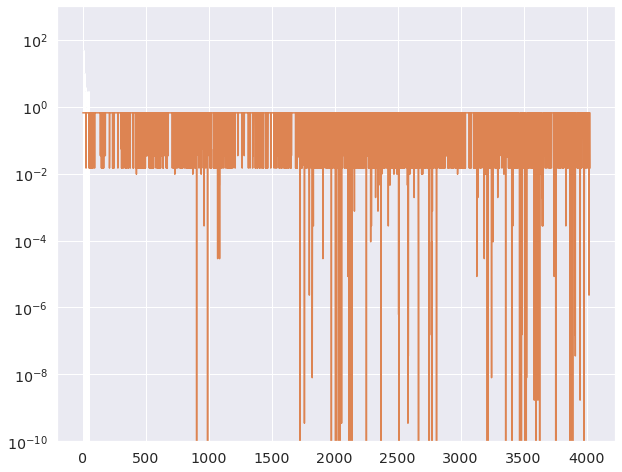

In [205]:
plt.figure(figsize=(10, 8))
plt.hist(macoma, range=(0, N), bins=N, log=True)
# plt.title('Гистограмма численности видов macona')
plt.plot(np.exp(zero_inflated_poisson_logpdf(
    4.7, 0.656, macoma
)))
plt.ylim((1e-10, 1e3));

**Ответ:** <...>

Почему при увеличении количества итераций получается плохое приближение? Предложите способ исправить этот недочет и реализуйте его.

*Замечания.*
1. Подумайте над этим пунктом сами, без уточняющих вопросов. По нашему опыту даже уточняющие вопросы могут напрямую указать другим студентам на решение.
2. Класс распределений менять нельзя. Будем считать, что заказчик умеет хорошо работать с пуассоновским, завышенным в нуле, и просит использовать именно его.

**Описание решения:** <...>

**Реализация решения:**

In [ ]:
<...>

**Ответ (значения оценок параметров):** <...>

**Вывод:** <...>